<a href="https://colab.research.google.com/github/kiraaa66/algGNEP/blob/main/EIA_nonlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Such

In [1]:
import numpy as np
from scipy.optimize import minimize
#!python -m pip install -U pandas
import pandas as pd
import itertools
import jax.numpy as jnp
from jax import random as jrandom
from jax import nn as jnn
from jax import jit
import numpy as np
import random
import math
import time
import sys
import jax
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint
from scipy import stats
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

# Fitness Evaluation

In [12]:
#https://docs.python.org/3/library/math.html
#http://hplgit.github.io/primer.html/doc/pub/funcif/._funcif-solarized001.html#:~:text=All%20Python%20functions%20begin%20with,the%20function%20must%20be%20indented.
def pen(a,b):

  def func1(x):
    return (x)**2 - x*b - x

  def func2(x):
    return (x)**2 - 0.5*a*x - 2*x

  bound1 = [(0.0,math.sqrt(1.0-(b)**2))]
  bound2 = [(0.0,math.sqrt(1.0-(a)**2))]

  result1 = minimize(func1, x0=0.0, method='SLSQP', bounds = bound1, options={'maxiter':5})
  result2 = minimize(func2, x0=0.0, method='SLSQP', bounds = bound2, options={'maxiter':5})

  shadowX = result1.x
  shadowY = result2.x

  penalty = math.sqrt((math.pow(a-shadowX,2))+(math.pow(b-shadowY,2)))

  return penalty

# Replacement Function

In [3]:
def minSearch(xMin):
  return xMin - (xMin - 0)*(math.pow(0.99,k))
def maxSearch(xMax):
  return xMax + (1 - xMax)*(math.pow(0.99,k))
def maxYSearch(yMax):
  return yMax + (1 - yMax)*(math.pow(0.99,k))

# Linear Regression Functions

In [4]:
#https://www.w3schools.com/python/python_ml_linear_regression.asp
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
#https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


transforming = PolynomialFeatures(degree=2, include_bias = False)

#Polynomial Functions

In [5]:
def poly(x):
  return coef1*math.pow(x,2) + coef2*x + yInt

# Randomize Function

In [6]:
def randomY(maxY, minY):
  return random.uniform(minY, maxY)

# Declaring All Arrays

In [7]:
#https://www.studytonight.com/python-howtos/how-to-declare-an-array-in-python
#https://linuxhint.com/numpy-create-2d-array/
#https://www.pluralsight.com/guides/different-ways-create-numpy-arrays
setXYP = np.zeros(3000)
setXYP = setXYP.reshape(1000,3)

setX = np.empty(1000, dtype=object)
setY = np.empty(1000, dtype=object)
penPts = np.zeros(1000, dtype=object)
ptNumbers = np.zeros(1000, dtype=object)
penSelection = np.empty(300, dtype=object)
penNo = np.empty(700, dtype=object)
newX = np.empty(300, dtype=float).reshape(-1,1)
newY = np.empty(300, dtype=float)
yReg = np.empty(700, dtype=float)
minY = np.empty(700, dtype=float)
maxY = np.empty(700, dtype=float)
#m = np.empty(1000, dtype=object)
#yInt = np.empty(1000, dtype=object)


# Runthrough of Code

1 f(x) = [-0.09692848 -0.53209082] 0.9797648868650445
2 f(x) = [ 0.01849333 -0.64833245] 0.9877015184982479
3 f(x) = [ 0.0956242  -0.70580425] 0.9825349119186355
4 f(x) = [ 0.06696006 -0.67762848] 0.9886266351533535
5 f(x) = [ 0.09780247 -0.71419572] 0.9857366701126894
6 f(x) = [ 0.14762981 -0.75303232] 0.9767182868818752
7 f(x) = [ 0.17539317 -0.7853639 ] 0.9733470741738126
8 f(x) = [ 0.17790282 -0.79264177] 0.9739181133675247
9 f(x) = [ 0.19816656 -0.81571477] 0.9710434364676059
10 f(x) = [ 0.19863916 -0.82151394] 0.9722187149713976


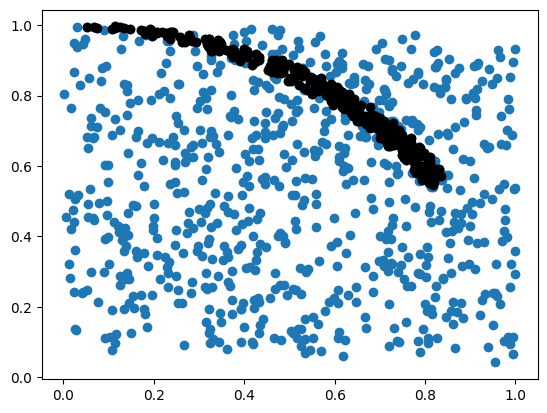

11 f(x) = [ 0.18844854 -0.81058014] 0.9737716318150849
12 f(x) = [ 0.18714604 -0.80284227] 0.9732431998626587
13 f(x) = [ 0.19739359 -0.81318603] 0.971562063008413
14 f(x) = [ 0.18207392 -0.79510907] 0.9741174489393114
15 f(x) = [ 0.19304339 -0.8067421 ] 0.9722559269114406
16 f(x) = [ 0.19156432 -0.80515751] 0.9723096587784857
17 f(x) = [ 0.19635049 -0.81105017] 0.9716669002927906
18 f(x) = [ 0.1935492  -0.81064878] 0.9729940438382758
19 f(x) = [ 0.18629191 -0.80375361] 0.9743050766866604
20 f(x) = [ 0.18464105 -0.80202134] 0.9745704270185352


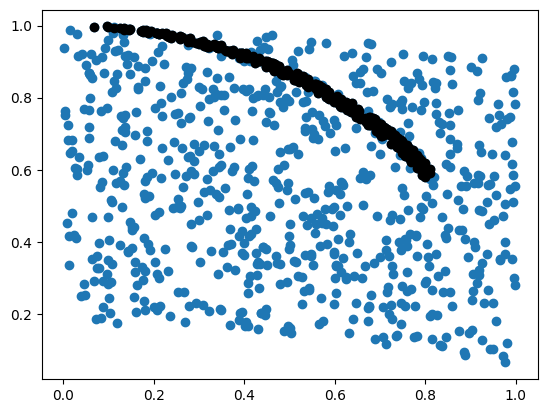

21 f(x) = [ 0.18786393 -0.80489758] 0.9737045850819512
22 f(x) = [ 0.18701175 -0.80474349] 0.9739964952723571
23 f(x) = [ 0.19485473 -0.81290839] 0.9726921148211476
24 f(x) = [ 0.19476549 -0.81206358] 0.9723708448542889
25 f(x) = [ 0.20074356 -0.81643494] 0.9707162376220863
26 f(x) = [ 0.20068518 -0.81750029] 0.9709336023785667
27 f(x) = [ 0.20722549 -0.82478951] 0.9696940763315576
28 f(x) = [ 0.2066552  -0.82395413] 0.9697461807028492
29 f(x) = [ 0.21033093 -0.8290356 ] 0.9692425082852894
30 f(x) = [ 0.21391776 -0.83305976] 0.9685146561938178


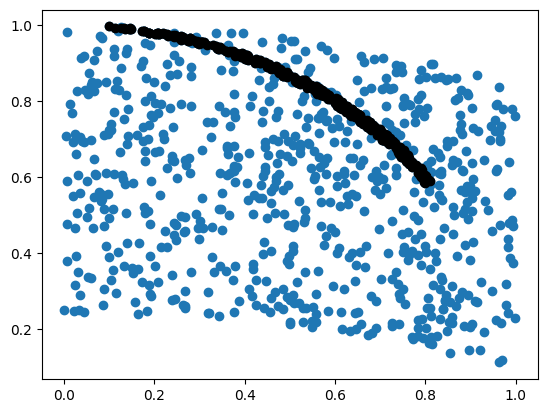

31 f(x) = [ 0.21247941 -0.83055738] 0.9685885862069675
32 f(x) = [ 0.21231437 -0.83033561] 0.9686734207888759
33 f(x) = [ 0.2105947  -0.82711193] 0.9687742054701842
34 f(x) = [ 0.20547487 -0.821594  ] 0.9697959010105911
35 f(x) = [ 0.20061774 -0.81737197] 0.9710184424440046
36 f(x) = [ 0.20883885 -0.82519214] 0.9690614692960866
37 f(x) = [ 0.20565774 -0.82129607] 0.9695851931195845
38 f(x) = [ 0.20637903 -0.82238516] 0.9695608048415976
39 f(x) = [ 0.20332567 -0.8192062 ] 0.9700935530908532
40 f(x) = [ 0.20421534 -0.81952383] 0.9697045265464501


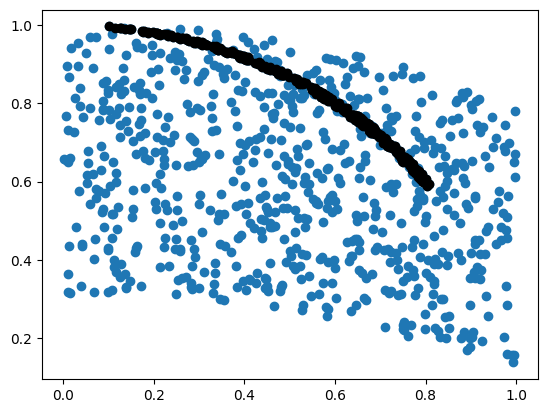

41 f(x) = [ 0.20547027 -0.8204091 ] 0.9692470022423484
42 f(x) = [ 0.20502546 -0.81908164] 0.9690298073262733
43 f(x) = [ 0.20293857 -0.81708499] 0.9694136738255634
44 f(x) = [ 0.20381775 -0.81866246] 0.9693387869536114
45 f(x) = [ 0.20166717 -0.81676427] 0.9697943267033362
46 f(x) = [ 0.19795984 -0.81190292] 0.9703938081288195
47 f(x) = [ 0.1976556  -0.81193743] 0.9705183804527285
48 f(x) = [ 0.19127513 -0.80578755] 0.9721492688259175
49 f(x) = [ 0.18786155 -0.80179162] 0.9727120065772609
50 f(x) = [ 0.19192552 -0.80554751] 0.9718264679083144


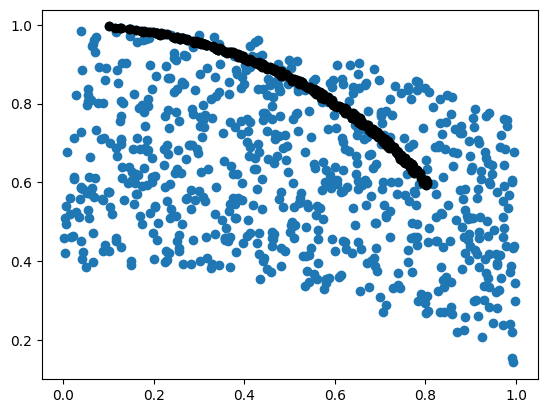

51 f(x) = [ 0.19337185 -0.80695408] 0.9715839806018776
52 f(x) = [ 0.20665087 -0.82033882] 0.9686742977382943
53 f(x) = [ 0.2078445  -0.82219133] 0.9685617951131268
54 f(x) = [ 0.2057348  -0.82025919] 0.9690131796283473
55 f(x) = [ 0.20257339 -0.81704912] 0.9696226619316204
56 f(x) = [ 0.20282433 -0.81788874] 0.969659392598251
57 f(x) = [ 0.20865454 -0.82307364] 0.968243800310138
58 f(x) = [ 0.20928165 -0.82404717] 0.9681228877879293
59 f(x) = [ 0.20957296 -0.82427949] 0.9680685208025913
60 f(x) = [ 0.21012575 -0.82518345] 0.9680242727302515


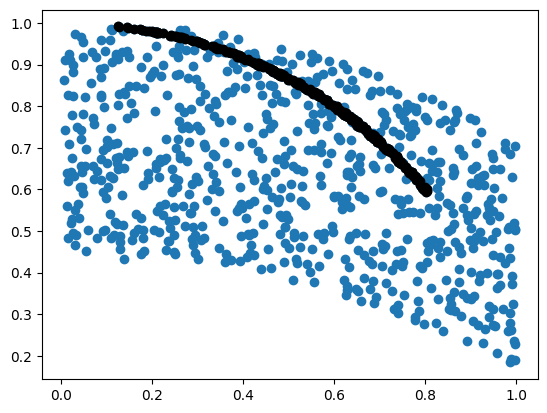

61 f(x) = [ 0.20968744 -0.82447528] 0.968107732689083
62 f(x) = [ 0.21126266 -0.8260119 ] 0.9677684067717217
63 f(x) = [ 0.21114564 -0.82615026] 0.9679224635082344
64 f(x) = [ 0.21062153 -0.82559197] 0.9680037956968187
65 f(x) = [ 0.2111776  -0.82620997] 0.967935470673285
66 f(x) = [ 0.21078227 -0.82560343] 0.9679082211515652
67 f(x) = [ 0.21092131 -0.82582735] 0.9679046765401789
68 f(x) = [ 0.21130812 -0.82642018] 0.9679511690403646
69 f(x) = [ 0.20994255 -0.82453636] 0.9681603547996787
70 f(x) = [ 0.21435474 -0.82849652] 0.967045148108263


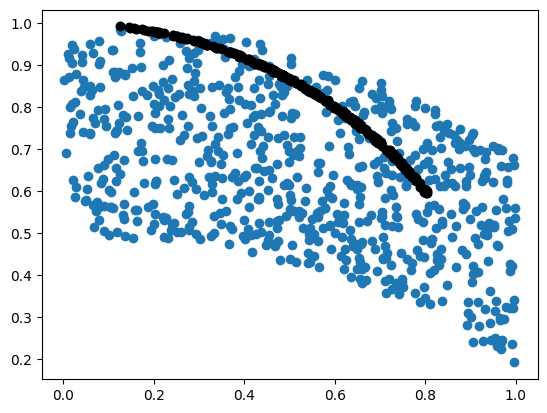

71 f(x) = [ 0.21597286 -0.83020241] 0.9667072467860387
72 f(x) = [ 0.21476666 -0.82883063] 0.9669143155429083
73 f(x) = [ 0.21512114 -0.8292313 ] 0.9668008679193665
74 f(x) = [ 0.21358506 -0.82746524] 0.9670320236862856
75 f(x) = [ 0.21266893 -0.82656232] 0.9671862160855647
76 f(x) = [ 0.21748664 -0.83115053] 0.9659570920268608
77 f(x) = [ 0.22012039 -0.83357969] 0.9653782916185707
78 f(x) = [ 0.21996068 -0.8333564 ] 0.9653761500147501
79 f(x) = [ 0.22268172 -0.83577248] 0.9646264225532324
80 f(x) = [ 0.22129985 -0.83446814] 0.9648844626513096


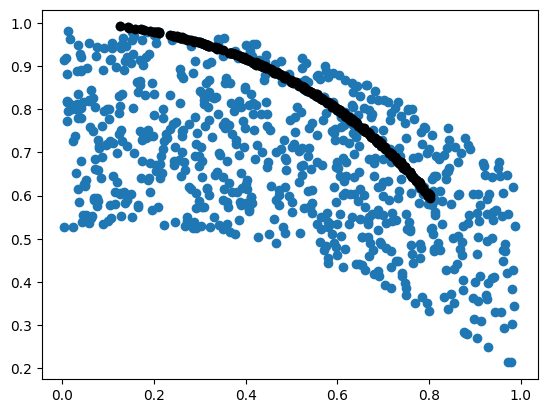

81 f(x) = [ 0.22004502 -0.83295101] 0.9651034473154976
82 f(x) = [ 0.22033697 -0.83325977] 0.9650646347627057
83 f(x) = [ 0.22487884 -0.83757792] 0.9639828742128465
84 f(x) = [ 0.23001932 -0.84232401] 0.9626863100466272
85 f(x) = [ 0.22991965 -0.84259096] 0.9629138939901947
86 f(x) = [ 0.22933709 -0.84196354] 0.9629773824346293
87 f(x) = [ 0.23037417 -0.8424923 ] 0.9625902117231336
88 f(x) = [ 0.23024762 -0.84258678] 0.9626359731141344
89 f(x) = [ 0.23119653 -0.84341591] 0.9624502912786111
90 f(x) = [ 0.23139737 -0.84355323] 0.962370598579554


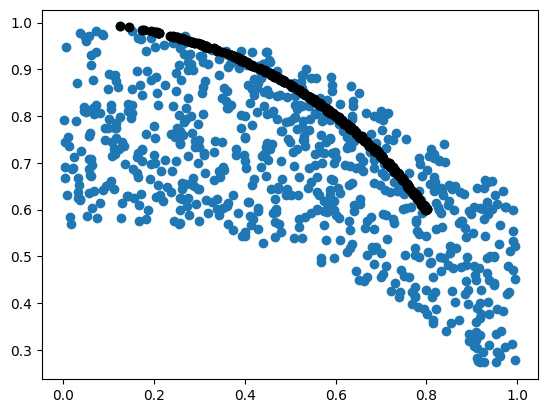

91 f(x) = [ 0.23079261 -0.84301587] 0.9625310674958795
92 f(x) = [ 0.23181913 -0.84439963] 0.9623648114926164
93 f(x) = [ 0.22749958 -0.83976929] 0.9632479872403134
94 f(x) = [ 0.22737185 -0.83956044] 0.9632295373219661
95 f(x) = [ 0.22647076 -0.83883039] 0.9634773495778017
96 f(x) = [ 0.2285988  -0.84125438] 0.9631522108571213
97 f(x) = [ 0.22653724 -0.83910925] 0.9635764347477707
98 f(x) = [ 0.23308841 -0.84488866] 0.9618529332372714
99 f(x) = [ 0.23053843 -0.84253475] 0.9625082170181292
100 f(x) = [ 0.230359   -0.84228288] 0.9625359943076628


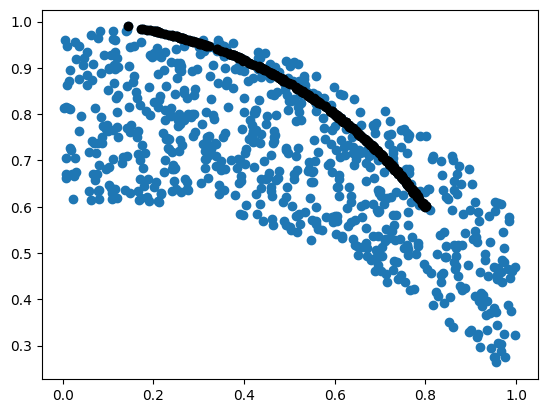

101 f(x) = [ 0.23595153 -0.84697966] 0.960984500981001
102 f(x) = [ 0.23668266 -0.84776132] 0.9608471552901722
103 f(x) = [ 0.23531324 -0.84602893] 0.961064659126879
104 f(x) = [ 0.23378015 -0.84417527] 0.9613435905000991
105 f(x) = [ 0.23391035 -0.84427502] 0.961325579375861
106 f(x) = [ 0.23577618 -0.84626849] 0.9609288662043513
107 f(x) = [ 0.2360782  -0.84667649] 0.9609320885726957
108 f(x) = [ 0.23713221 -0.84794343] 0.9607786652705859
109 f(x) = [ 0.23468697 -0.84558584] 0.9613813129360794
110 f(x) = [ 0.23406966 -0.84475962] 0.9614893634761106


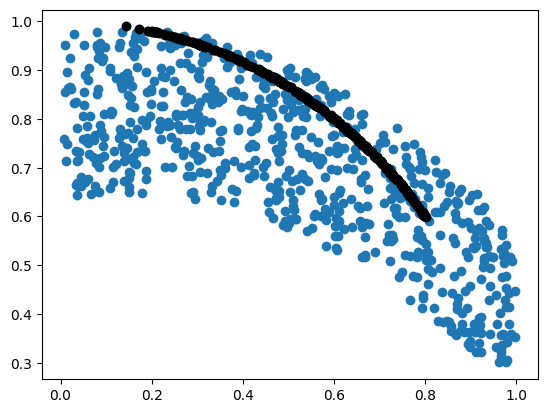

111 f(x) = [ 0.23568377 -0.84668514] 0.9612273441054687
112 f(x) = [ 0.23436392 -0.84509996] 0.9614433450068395
113 f(x) = [ 0.23202019 -0.84290626] 0.9620338335807002
114 f(x) = [ 0.23178707 -0.8426049 ] 0.9620381309459805
115 f(x) = [ 0.23293314 -0.84407979] 0.9618424797006189
116 f(x) = [ 0.2324866  -0.84357099] 0.9619850823558451
117 f(x) = [ 0.23070448 -0.8420321 ] 0.9625008036095274
118 f(x) = [ 0.22768521 -0.83922084] 0.9632316484257788
119 f(x) = [ 0.22779232 -0.83932796] 0.963223340741457
120 f(x) = [ 0.22658442 -0.8378276 ] 0.9634034049139379


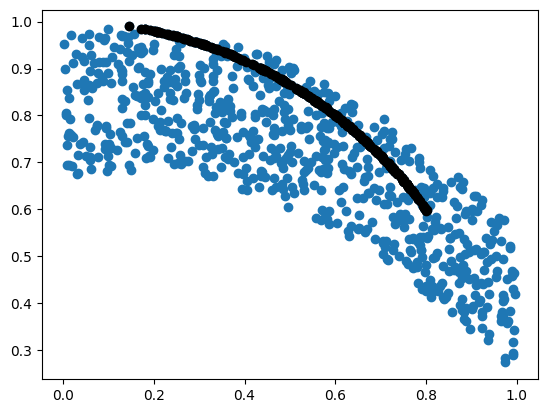

121 f(x) = [ 0.22714858 -0.83833826] 0.9632490287037287
122 f(x) = [ 0.22618028 -0.83762941] 0.9635644493042852
123 f(x) = [ 0.2256381  -0.83715212] 0.9636717366835156
124 f(x) = [ 0.22429454 -0.83596754] 0.964021610183539
125 f(x) = [ 0.22470675 -0.83656727] 0.9639498666875135
126 f(x) = [ 0.22401757 -0.8359992 ] 0.9641379274597166
127 f(x) = [ 0.22569853 -0.83805904] 0.9638132373687929
128 f(x) = [ 0.22306625 -0.8352463 ] 0.9643409604280613
129 f(x) = [ 0.22282529 -0.83484786] 0.964357128450869
130 f(x) = [ 0.22068604 -0.83286514] 0.9648462568911578


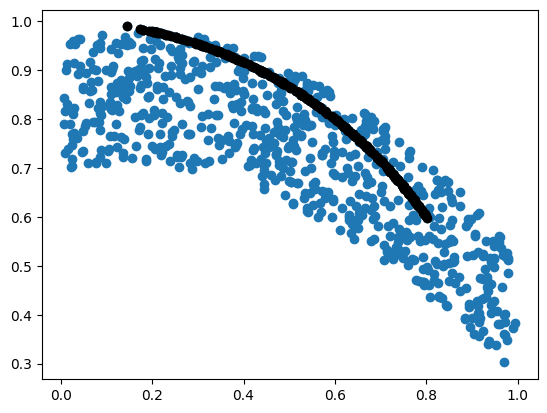

131 f(x) = [ 0.22149537 -0.83380723] 0.9647206849364753
132 f(x) = [ 0.22144939 -0.83370642] 0.9647087770732614
133 f(x) = [ 0.22106201 -0.83329516] 0.964772918950688
134 f(x) = [ 0.22302263 -0.83532524] 0.964340021475511
135 f(x) = [ 0.22361543 -0.83621922] 0.9642726234086139
136 f(x) = [ 0.22406537 -0.83679864] 0.9642144981854411
137 f(x) = [ 0.22440332 -0.83706039] 0.9641372177110057
138 f(x) = [ 0.2246798  -0.83749715] 0.9641000001079776
139 f(x) = [ 0.2239529  -0.83675993] 0.9642231314093344
140 f(x) = [ 0.22335599 -0.83580141] 0.9642363710810644


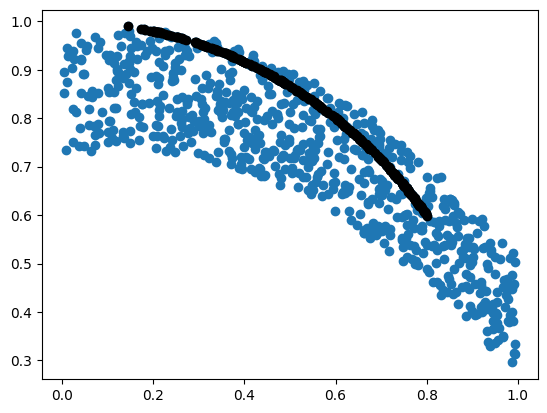

141 f(x) = [ 0.22343842 -0.83592175] 0.9642004575303937
142 f(x) = [ 0.22401709 -0.83651411] 0.9640972130382472
143 f(x) = [ 0.22241747 -0.83504081] 0.9645325141184904
144 f(x) = [ 0.22225195 -0.83487942] 0.9645687577548623
145 f(x) = [ 0.22208245 -0.83478982] 0.9646142636897855
146 f(x) = [ 0.22196071 -0.83458965] 0.9645911955364723
147 f(x) = [ 0.22513117 -0.83773212] 0.9638295086352308
148 f(x) = [ 0.22338962 -0.83597125] 0.9642227803284475
149 f(x) = [ 0.22168681 -0.83425848] 0.9646082936623968
150 f(x) = [ 0.21985458 -0.832471  ] 0.9650235139827317


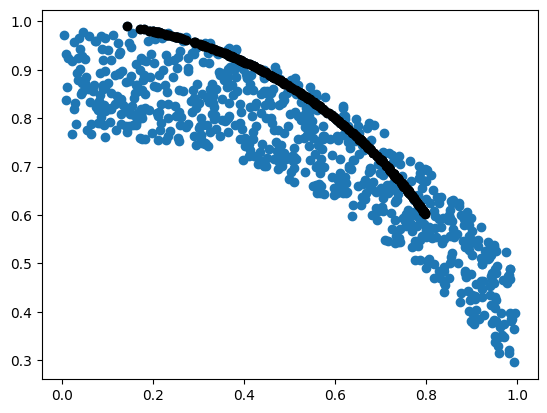

151 f(x) = [ 0.21976554 -0.8322632 ] 0.9650073928241173
152 f(x) = [ 0.21962768 -0.83199377] 0.9649515533426991
153 f(x) = [ 0.22040461 -0.83248616] 0.9646547900504954
154 f(x) = [ 0.2203329  -0.83231959] 0.9646571155759912
155 f(x) = [ 0.22037215 -0.83247199] 0.9646892591271639
156 f(x) = [ 0.22093645 -0.83317964] 0.9646061748416412
157 f(x) = [ 0.21898087 -0.83073058] 0.9649199593145692
158 f(x) = [ 0.22124252 -0.83270584] 0.9643284772411834
159 f(x) = [ 0.22140484 -0.83316998] 0.9644066734762805
160 f(x) = [ 0.22189608 -0.83368508] 0.9643235762382577


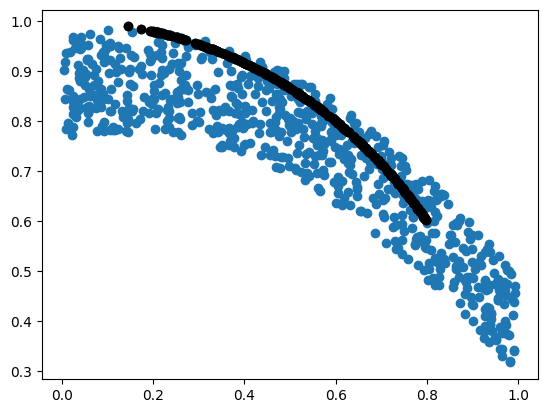

161 f(x) = [ 0.22244671 -0.83460776] 0.964243742419365
162 f(x) = [ 0.22314538 -0.8354329 ] 0.9641389879439657
163 f(x) = [ 0.22277175 -0.83506614] 0.9642416488201571
164 f(x) = [ 0.22261268 -0.83497493] 0.9643042611281811
165 f(x) = [ 0.2222668  -0.83459716] 0.9643697792154404
166 f(x) = [ 0.22205454 -0.83413584] 0.9643766380293294
167 f(x) = [ 0.22167149 -0.83380862] 0.9644570451985074
168 f(x) = [ 0.22103676 -0.83300813] 0.96457051700275
169 f(x) = [ 0.22111444 -0.83311887] 0.9645456068971084
170 f(x) = [ 0.2213835  -0.83347362] 0.9645101240550167


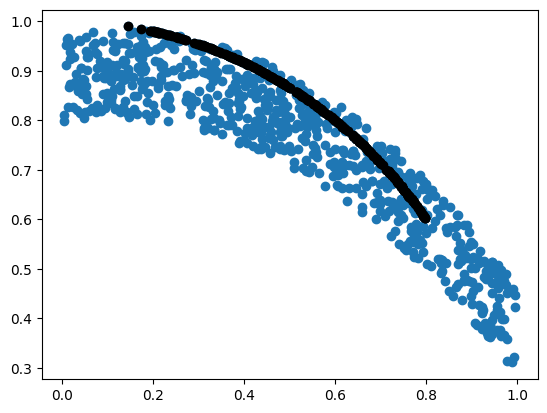

171 f(x) = [ 0.22152472 -0.83377329] 0.9645087585372825
172 f(x) = [ 0.22179703 -0.83409389] 0.9644834469851054
173 f(x) = [ 0.22184468 -0.83414348] 0.9644738084003959
174 f(x) = [ 0.22187184 -0.83413571] 0.9644510191917104
175 f(x) = [ 0.21930992 -0.83149514] 0.9650278597387425
176 f(x) = [ 0.2205592  -0.83279362] 0.9647633592178604
177 f(x) = [ 0.22088419 -0.8330809 ] 0.9646855404763327
178 f(x) = [ 0.22208151 -0.83405505] 0.9643555515297625
179 f(x) = [ 0.22200136 -0.83401148] 0.9643891261057485
180 f(x) = [ 0.22364433 -0.83568525] 0.963993029020107


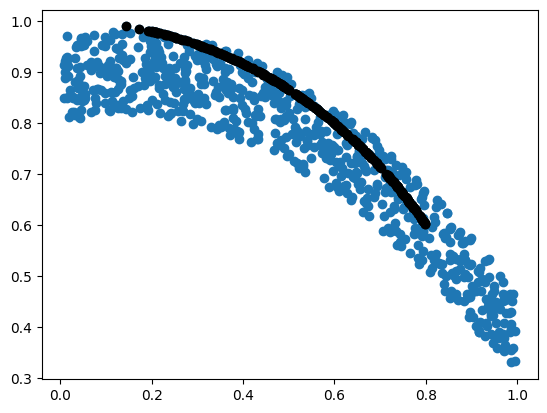

181 f(x) = [ 0.22229047 -0.83402564] 0.9642115555900175
182 f(x) = [ 0.22315536 -0.8349825 ] 0.964071353047515
183 f(x) = [ 0.22233633 -0.83423948] 0.9643075185044802
184 f(x) = [ 0.22167074 -0.83358606] 0.9644303800690013
185 f(x) = [ 0.22140449 -0.83334993] 0.9644888022497176
186 f(x) = [ 0.22143885 -0.83343189] 0.9645427593929126
187 f(x) = [ 0.22234915 -0.83437084] 0.9643674334087861
188 f(x) = [ 0.22341974 -0.83563101] 0.9641661415588203
189 f(x) = [ 0.22341974 -0.83563101] 0.9641661415588203
190 f(x) = [ 0.22341974 -0.83563101] 0.9641661415588203


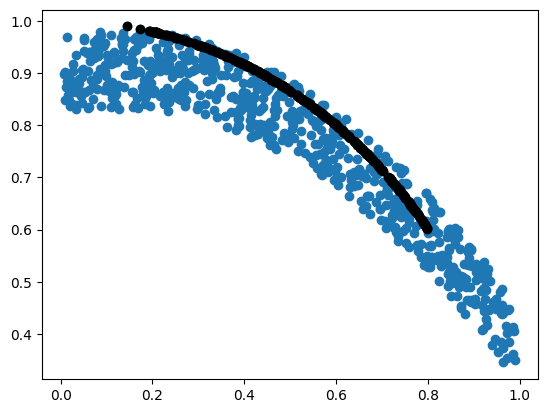

191 f(x) = [ 0.2219109  -0.83392298] 0.9644557168105405
192 f(x) = [ 0.22226129 -0.83428095] 0.9643853169688453
193 f(x) = [ 0.22196886 -0.83409289] 0.9644794541202261
194 f(x) = [ 0.22096163 -0.83300127] 0.9646671086864493
195 f(x) = [ 0.22302008 -0.83511912] 0.9642467745848359
196 f(x) = [ 0.22309148 -0.83518302] 0.9642332765405874
197 f(x) = [ 0.22664952 -0.83901304] 0.9634753638934321
198 f(x) = [ 0.22716434 -0.83942129] 0.9633230283000411
199 f(x) = [ 0.22670039 -0.83900606] 0.9634447967607757
200 f(x) = [ 0.2268108  -0.83889549] 0.9633318002738426


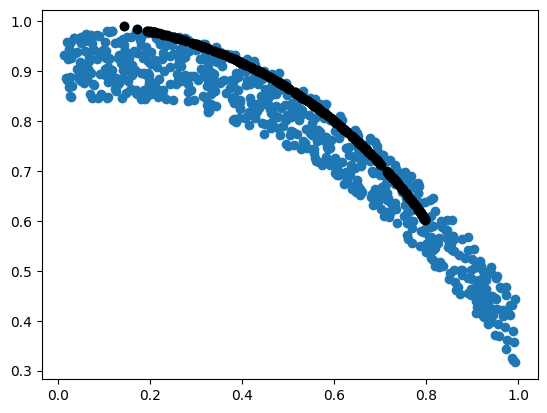

201 f(x) = [ 0.22706418 -0.83913208] 0.9632201860996261
202 f(x) = [ 0.2271644 -0.8392304] 0.963200506366912
203 f(x) = [ 0.22692746 -0.83888793] 0.9632138113390514
204 f(x) = [ 0.22787449 -0.83970185] 0.9629212005898978
205 f(x) = [ 0.22862376 -0.84026762] 0.9626743004810376
206 f(x) = [ 0.22818695 -0.83974328] 0.9627574919830002
207 f(x) = [ 0.22860199 -0.83997008] 0.9626356342906969
208 f(x) = [ 0.22812011 -0.8395675 ] 0.9627630640325109
209 f(x) = [ 0.22778447 -0.83924962] 0.9628327183891707
210 f(x) = [ 0.22818909 -0.83952655] 0.9627134020546775


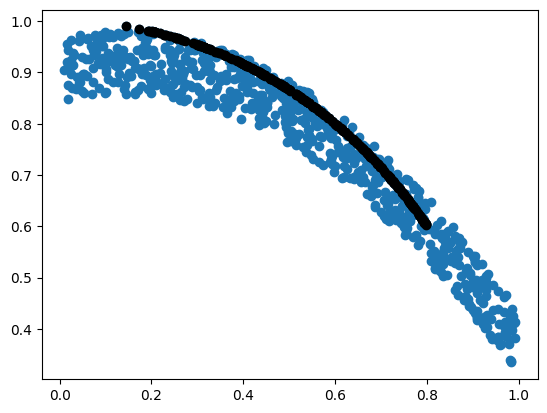

211 f(x) = [ 0.22895398 -0.84047957] 0.9626092457402099
212 f(x) = [ 0.22873969 -0.84029949] 0.9626576236029637
213 f(x) = [ 0.22892435 -0.84052139] 0.962635549030592
214 f(x) = [ 0.22755839 -0.8392541 ] 0.9629523256766681
215 f(x) = [ 0.22763761 -0.83948532] 0.9629704171009386
216 f(x) = [ 0.22797634 -0.83979382] 0.9628943290287774
217 f(x) = [ 0.22882265 -0.84046383] 0.9626842237633847
218 f(x) = [ 0.23187409 -0.8430672 ] 0.9618504098550151
219 f(x) = [ 0.23233695 -0.84349131] 0.9617001576797423
220 f(x) = [ 0.23268478 -0.84382291] 0.9616298848363564


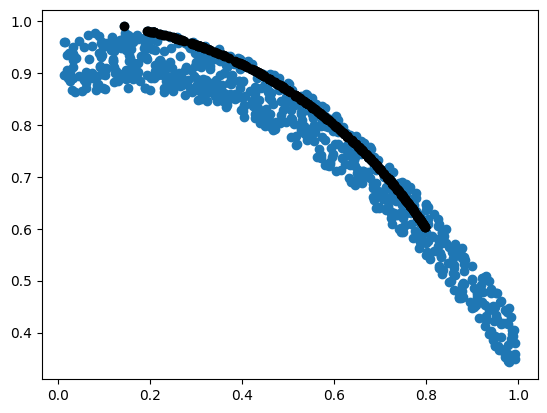

221 f(x) = [ 0.23219524 -0.84314377] 0.9616431633885067
222 f(x) = [ 0.23203108 -0.84301562] 0.9616823413711063
223 f(x) = [ 0.23267173 -0.84359236] 0.9615320867460817
224 f(x) = [ 0.23330351 -0.84431597] 0.961444324080732
225 f(x) = [ 0.23289571 -0.84396411] 0.9615337915746307
226 f(x) = [ 0.23345641 -0.84422117] 0.9612644387532738
227 f(x) = [ 0.23356241 -0.84425325] 0.9612347376402832
228 f(x) = [ 0.23388881 -0.84455096] 0.9611565754574816
229 f(x) = [ 0.23405889 -0.84472326] 0.9611115632682942
230 f(x) = [ 0.23306373 -0.84359053] 0.9612930653978111


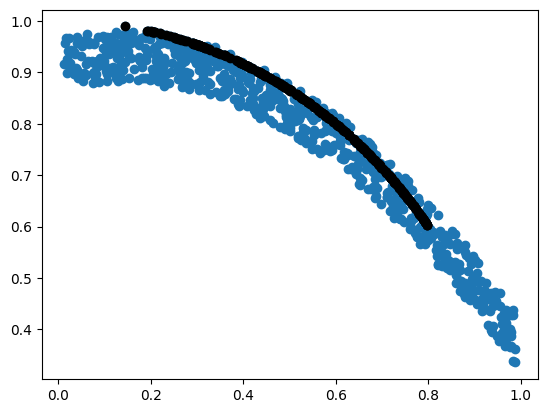

231 f(x) = [ 0.23455391 -0.84475931] 0.9608596823808124
232 f(x) = [ 0.23475798 -0.84504774] 0.9608734019683927
233 f(x) = [ 0.23577004 -0.84590485] 0.9605938434456806
234 f(x) = [ 0.23724023 -0.8469889 ] 0.9601107625150259
235 f(x) = [ 0.23738805 -0.84718109] 0.9600871256226646
236 f(x) = [ 0.2372142  -0.84708771] 0.9601014585050778
237 f(x) = [ 0.23641125 -0.84650955] 0.9603015785844136
238 f(x) = [ 0.23588155 -0.84594377] 0.9603938181444464
239 f(x) = [ 0.23568416 -0.84581732] 0.9604049598174189
240 f(x) = [ 0.23793337 -0.84750477] 0.9597799206592912


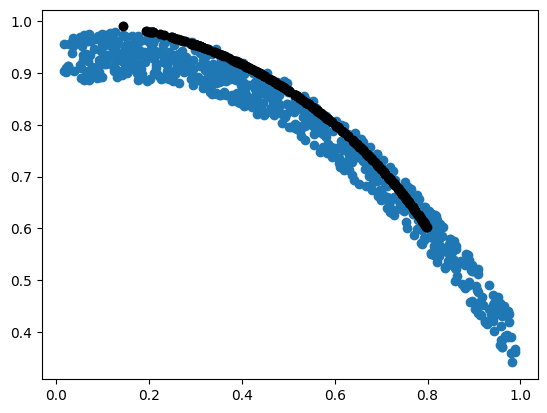

241 f(x) = [ 0.2382509  -0.84784648] 0.9597187657585495
242 f(x) = [ 0.2384347 -0.8480304] 0.9596912485889274
243 f(x) = [ 0.23669115 -0.84633962] 0.960087703674407
244 f(x) = [ 0.23666917 -0.84637211] 0.9601188918290776
245 f(x) = [ 0.23666917 -0.84637211] 0.9601188918290776
246 f(x) = [ 0.23684758 -0.84652201] 0.9600699814303295
247 f(x) = [ 0.2371921  -0.84683958] 0.9600080181374576
248 f(x) = [ 0.23739117 -0.84705968] 0.9599653332830481
249 f(x) = [ 0.2370319  -0.84673123] 0.9600310346319656
250 f(x) = [ 0.2370319  -0.84673123] 0.9600310346319656


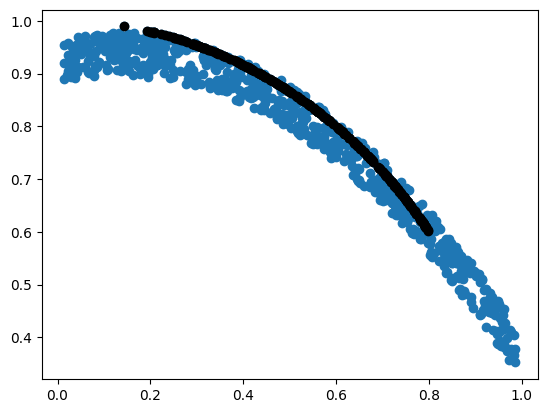

251 f(x) = [ 0.23652978 -0.84620534] 0.9601183587416071
252 f(x) = [ 0.23766982 -0.84741622] 0.9598755557151594
253 f(x) = [ 0.23794957 -0.84768523] 0.9598009474778315
254 f(x) = [ 0.23910979 -0.84833149] 0.9593866223617679
255 f(x) = [ 0.23910979 -0.84833149] 0.9593866223617679
256 f(x) = [ 0.24089544 -0.84992379] 0.95888577781727
257 f(x) = [ 0.24032384 -0.84920296] 0.9589592631069214
258 f(x) = [ 0.23984983 -0.84869158] 0.9590399450203559
259 f(x) = [ 0.23997982 -0.84874323] 0.9589959285368292
260 f(x) = [ 0.24058337 -0.84933881] 0.9588638805829575


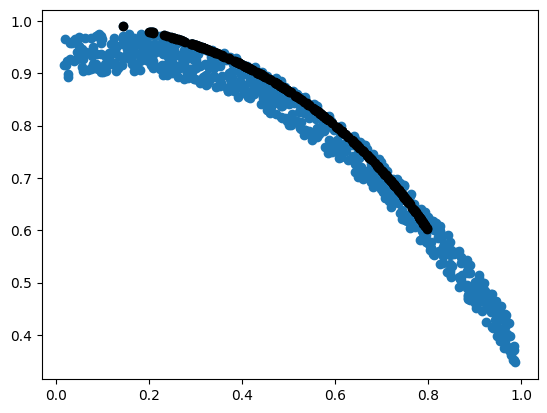

261 f(x) = [ 0.24107693 -0.84973297] 0.9587667866793367
262 f(x) = [ 0.24121255 -0.84999383] 0.9587504863317051
263 f(x) = [ 0.24248363 -0.85128338] 0.9584726579525955
264 f(x) = [ 0.2430438  -0.85183205] 0.9583577984236056
265 f(x) = [ 0.24466249 -0.85356847] 0.9580419273078027
266 f(x) = [ 0.24562627 -0.85469382] 0.9578543488409863
267 f(x) = [ 0.24508659 -0.85415353] 0.9579468692204647
268 f(x) = [ 0.24511697 -0.85416594] 0.9579450090705044
269 f(x) = [ 0.2447011  -0.85373295] 0.9580348302599904
270 f(x) = [ 0.24396987 -0.85288747] 0.9581561813421562


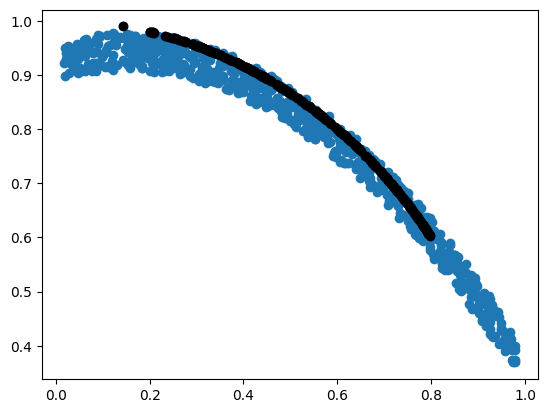

271 f(x) = [ 0.24434869 -0.85323666] 0.958088984152445
272 f(x) = [ 0.24434869 -0.85323666] 0.958088984152445
273 f(x) = [ 0.24397117 -0.8529472 ] 0.9581883455550282
274 f(x) = [ 0.24543737 -0.85434032] 0.9578731602223023
275 f(x) = [ 0.24649982 -0.85524505] 0.9575809132949233
276 f(x) = [ 0.24703344 -0.85574679] 0.9574653090717883
277 f(x) = [ 0.24613652 -0.85485294] 0.9576464881902995
278 f(x) = [ 0.246719   -0.85568857] 0.9575613230944222
279 f(x) = [ 0.24756894 -0.85640606] 0.9573395650340862
280 f(x) = [ 0.24823991 -0.85706375] 0.9571948078009795


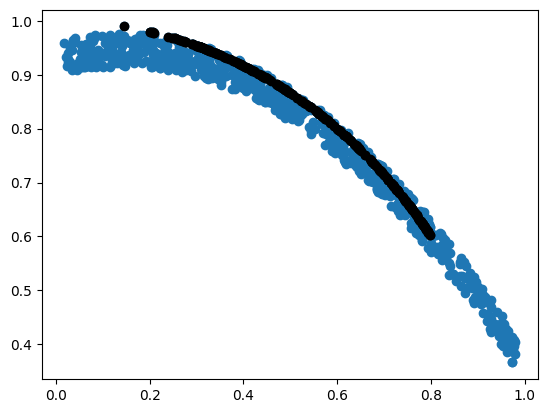

281 f(x) = [ 0.24892796 -0.85765084] 0.9570161513953
282 f(x) = [ 0.24891656 -0.85767358] 0.9570233268878274
283 f(x) = [ 0.24867489 -0.85741452] 0.9570554869940786
284 f(x) = [ 0.24910351 -0.85771142] 0.9569217623430286
285 f(x) = [ 0.24920632 -0.85776489] 0.9568773824048009
286 f(x) = [ 0.25042915 -0.8590341 ] 0.9566519634090085
287 f(x) = [ 0.25001619 -0.85867626] 0.9567371656556349
288 f(x) = [ 0.24996155 -0.85871801] 0.9567760596275254
289 f(x) = [ 0.24996155 -0.85871801] 0.9567760596275254
290 f(x) = [ 0.25036064 -0.85923271] 0.9566999984957969


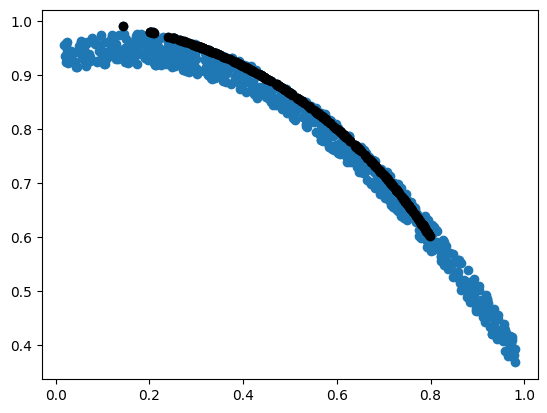

291 f(x) = [ 0.25005292 -0.85893889] 0.9567809957143351
292 f(x) = [ 0.24946654 -0.85831122] 0.9569176843619314
293 f(x) = [ 0.25213862 -0.86052299] 0.9561524698361945
294 f(x) = [ 0.25246185 -0.86072264] 0.9560558147846405
295 f(x) = [ 0.25381827 -0.8619266 ] 0.9557144620653749
296 f(x) = [ 0.2538631  -0.86197696] 0.9557003593805662
297 f(x) = [ 0.25385224 -0.86196689] 0.9557027865769508
298 f(x) = [ 0.25342344 -0.86156994] 0.9557993162956235
299 f(x) = [ 0.25420907 -0.86239059] 0.9556308612786961
300 f(x) = [ 0.25404509 -0.86225599] 0.955674198043818


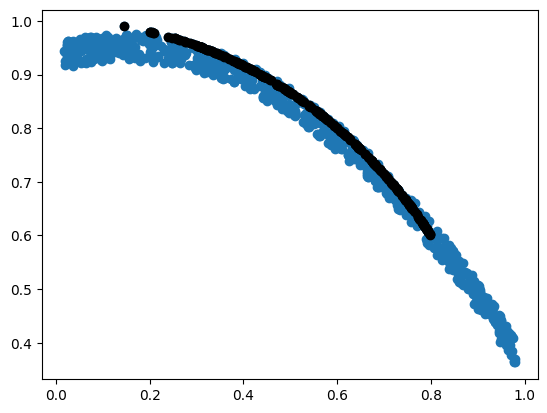

301 f(x) = [ 0.25379246 -0.8620499 ] 0.9557470269898062
302 f(x) = [ 0.25372926 -0.86204492] 0.9557807135077478
303 f(x) = [ 0.25263069 -0.86084113] 0.9559983864014137
304 f(x) = [ 0.25165211 -0.85984822] 0.9561939897237351
305 f(x) = [ 0.25160857 -0.8599177 ] 0.956273610601068
306 f(x) = [ 0.25129146 -0.85968819] 0.9563646698018782
307 f(x) = [ 0.25189419 -0.86006144] 0.9562306877898785
308 f(x) = [ 0.25230416 -0.86049672] 0.9561472728856665
309 f(x) = [ 0.25303987 -0.86132964] 0.9560177147519364
310 f(x) = [ 0.25178633 -0.85984532] 0.9562395161469046


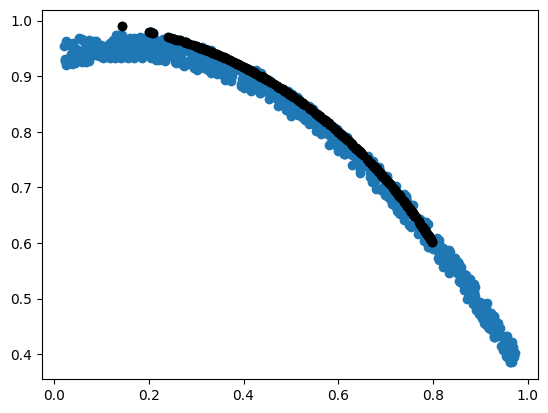

311 f(x) = [ 0.25621214 -0.86382427] 0.9550746558597561
312 f(x) = [ 0.25592656 -0.86354539] 0.9551339180195022
313 f(x) = [ 0.25599709 -0.86357864] 0.955087185010532
314 f(x) = [ 0.25599709 -0.86357864] 0.955087185010532
315 f(x) = [ 0.25573603 -0.86338437] 0.9551605509387684
316 f(x) = [ 0.2573333  -0.86517559] 0.9548306122324945
317 f(x) = [ 0.25678854 -0.86450451] 0.954940105160386
318 f(x) = [ 0.25782633 -0.86563024] 0.9547219595257572
319 f(x) = [ 0.25813612 -0.8659399 ] 0.9546535888147307
320 f(x) = [ 0.25832653 -0.86614637] 0.9546225334306265


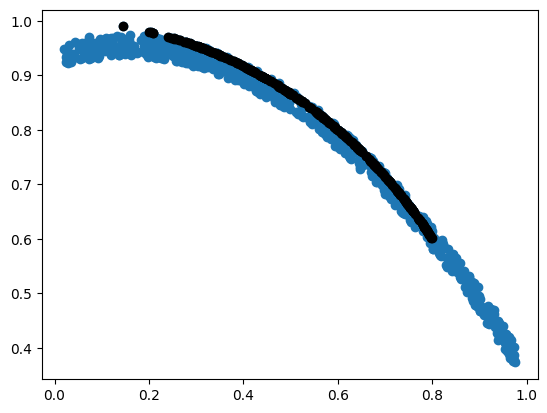

321 f(x) = [ 0.26006037 -0.86783032] 0.9541837147516473
322 f(x) = [ 0.25890253 -0.86650882] 0.9544052746911555
323 f(x) = [ 0.25939892 -0.86692837] 0.9542821243526981
324 f(x) = [ 0.25939892 -0.86692837] 0.9542821243526981
325 f(x) = [ 0.25791336 -0.86546004] 0.9546079320808128
326 f(x) = [ 0.26051352 -0.8678137 ] 0.9539245511230267
327 f(x) = [ 0.25908943 -0.86612997] 0.9541898561089335
328 f(x) = [ 0.25853394 -0.86545608] 0.9542935973220883
329 f(x) = [ 0.25836704 -0.86529715] 0.9543339948946308
330 f(x) = [ 0.25826527 -0.8652204 ] 0.9543781427635036


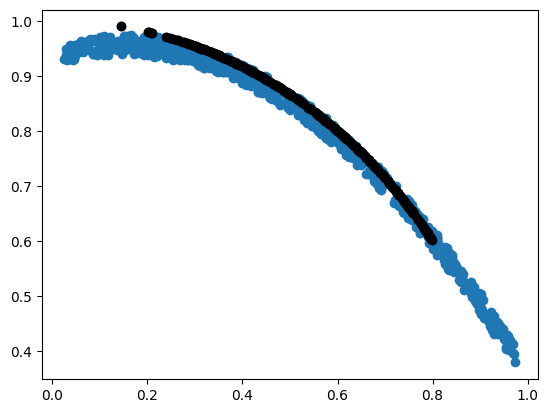

331 f(x) = [ 0.25881926 -0.86576857] 0.9542714250502365
332 f(x) = [ 0.25937189 -0.86620392] 0.9541541193604134
333 f(x) = [ 0.25962329 -0.86647612] 0.9541036069080323
334 f(x) = [ 0.25950037 -0.86639077] 0.9541507105619421
335 f(x) = [ 0.25915349 -0.86605275] 0.954227048627877
336 f(x) = [ 0.26111425 -0.86793068] 0.953725888215814
337 f(x) = [ 0.2608614  -0.86771787] 0.9537808466240272
338 f(x) = [ 0.26091645 -0.86771814] 0.9537594842422384
339 f(x) = [ 0.26014285 -0.86691492] 0.9539043276248126
340 f(x) = [ 0.26042863 -0.86690026] 0.9537968155376758


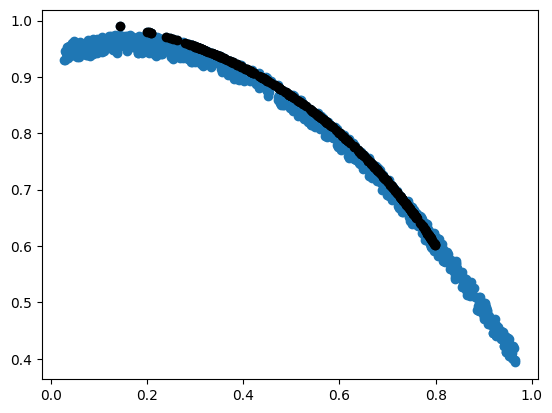

341 f(x) = [ 0.25970293 -0.86605928] 0.9539539307313605
342 f(x) = [ 0.26045852 -0.86682135] 0.9538259870919799
343 f(x) = [ 0.2607988 -0.8671409] 0.9537709076757004
344 f(x) = [ 0.26133147 -0.86784039] 0.9537124843668507
345 f(x) = [ 0.26211996 -0.86870836] 0.9535772713138708
346 f(x) = [ 0.25952792 -0.86601871] 0.9541024701251462
347 f(x) = [ 0.25952792 -0.86601871] 0.9541024701251462
348 f(x) = [ 0.26002908 -0.86658464] 0.9540232506528279
349 f(x) = [ 0.26123893 -0.8678016 ] 0.953739739424458
350 f(x) = [ 0.26143962 -0.86804413] 0.9537318587794532


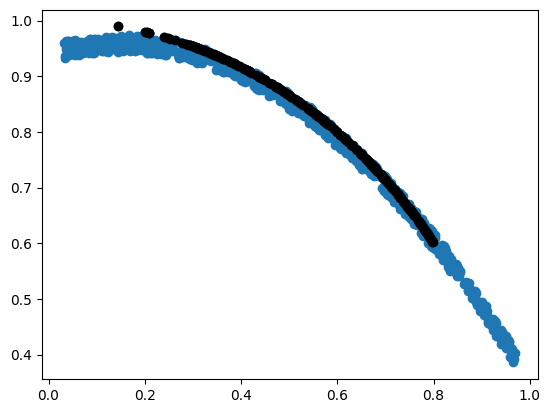

351 f(x) = [ 0.26248154 -0.8691821 ] 0.9535233868322056
352 f(x) = [ 0.26227212 -0.86902315] 0.9535770103428632
353 f(x) = [ 0.26150109 -0.86833876] 0.9537748653754196
354 f(x) = [ 0.26086872 -0.86780759] 0.9539078600844619
355 f(x) = [ 0.26631401 -0.87270872] 0.9524976026903851
356 f(x) = [ 0.26716539 -0.87370038] 0.952312462505835
357 f(x) = [ 0.26726911 -0.8736688 ] 0.9522959474165983
358 f(x) = [ 0.27218632 -0.87783073] 0.9509099502552523
359 f(x) = [ 0.27232951 -0.87800288] 0.9508814062595208
360 f(x) = [ 0.27221527 -0.87782445] 0.9508605992832266


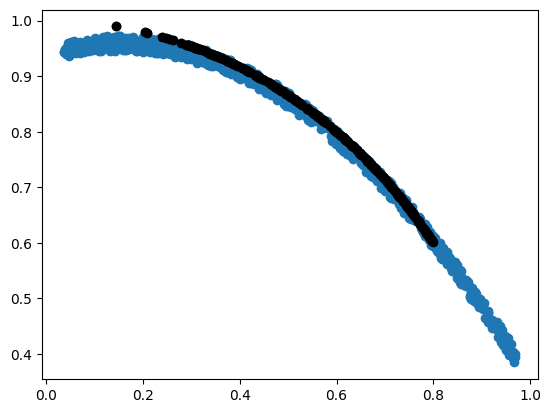

361 f(x) = [ 0.2716405  -0.87729554] 0.9509825569953911
362 f(x) = [ 0.27249539 -0.87825555] 0.9508127940972955
363 f(x) = [ 0.27094283 -0.87661082] 0.9511300428332622
364 f(x) = [ 0.2706015  -0.87626306] 0.9512015079145054
365 f(x) = [ 0.26873586 -0.87431003] 0.9515861861364989
366 f(x) = [ 0.26833728 -0.87392899] 0.9516735944603485
367 f(x) = [ 0.26722149 -0.87294111] 0.9519343959736736
368 f(x) = [ 0.26843742 -0.87422346] 0.95167287182732
369 f(x) = [ 0.26852214 -0.87431209] 0.9516731632169785
370 f(x) = [ 0.26749783 -0.87323517] 0.9519045494055529


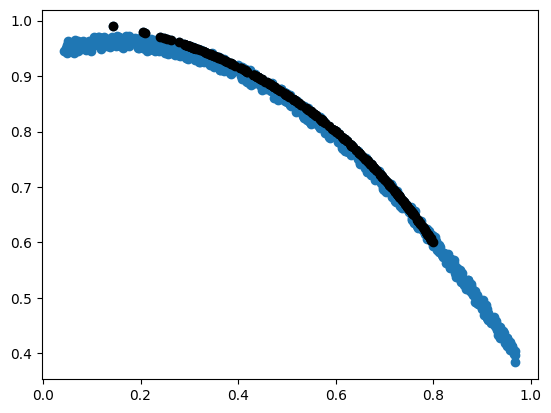

371 f(x) = [ 0.26819417 -0.87394208] 0.9517910939795411
372 f(x) = [ 0.26810365 -0.87384806] 0.9518100796921143
373 f(x) = [ 0.26780313 -0.87361124] 0.9518820373743636
374 f(x) = [ 0.26716502 -0.87294505] 0.9520395156398764
375 f(x) = [ 0.26693593 -0.87280067] 0.9521183759000307
376 f(x) = [ 0.26731965 -0.87313064] 0.9520315175157608
377 f(x) = [ 0.26713013 -0.8729072 ] 0.9520682499903397
378 f(x) = [ 0.26716333 -0.87294017] 0.9520616677976195
379 f(x) = [ 0.26716333 -0.87294017] 0.9520616677976195
380 f(x) = [ 0.28371887 -0.88728386] 0.9476075965836056


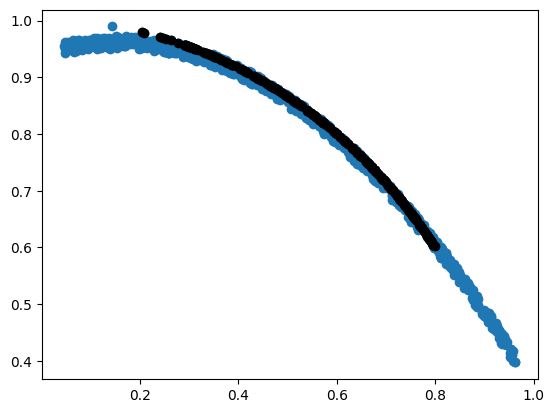

381 f(x) = [ 0.2865988  -0.89026102] 0.9470251257364114
382 f(x) = [ 0.28731008 -0.89095704] 0.9468754928861659
383 f(x) = [ 0.28753197 -0.89104838] 0.9467772949878247
384 f(x) = [ 0.287966   -0.89151155] 0.9466720494422494
385 f(x) = [ 0.2890721  -0.89254056] 0.9463940689331142
386 f(x) = [ 0.28937403 -0.89283275] 0.9463371140270271
387 f(x) = [ 0.2891907  -0.89267431] 0.9463673260743651
388 f(x) = [ 0.28900388 -0.89251896] 0.9464098801377399
389 f(x) = [ 0.2895572 -0.8930641] 0.9463076030242241
390 f(x) = [ 0.28936208 -0.89288667] 0.9463550909015903


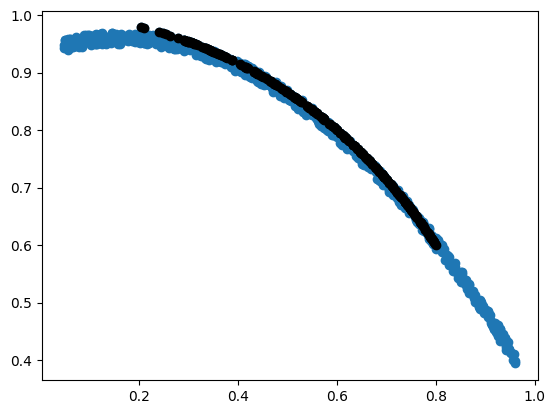

391 f(x) = [ 0.29009456 -0.89357407] 0.9461981334036781
392 f(x) = [ 0.29000841 -0.8934948 ] 0.9462298237660541
393 f(x) = [ 0.28885676 -0.89221885] 0.946426694428651
394 f(x) = [ 0.28885676 -0.89221885] 0.946426694428651
395 f(x) = [ 0.28906287 -0.89238681] 0.9463760653939326
396 f(x) = [ 0.2885209  -0.89164911] 0.946451739245225
397 f(x) = [ 0.28830745 -0.8914269 ] 0.9464702420772662
398 f(x) = [ 0.28826895 -0.89130831] 0.9464631447234217
399 f(x) = [ 0.28690371 -0.88999785] 0.9467699454308709
400 f(x) = [ 0.28774298 -0.8908945 ] 0.9465813989672276


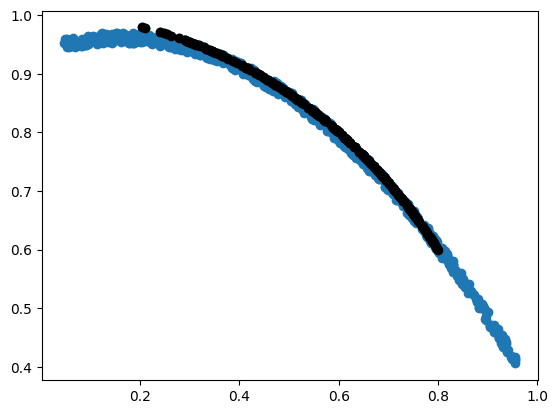

401 f(x) = [ 0.28952148 -0.89261498] 0.9461769917678138
402 f(x) = [ 0.2899423  -0.89298786] 0.9460791504938593
403 f(x) = [ 0.29023577 -0.89318643] 0.9459972323060866
404 f(x) = [ 0.29120785 -0.89420932] 0.9457688297159338
405 f(x) = [ 0.29096864 -0.89396475] 0.9458222609919671
406 f(x) = [ 0.29008978 -0.89312356] 0.9460202584085505
407 f(x) = [ 0.28743745 -0.89055466] 0.9465863791448634
408 f(x) = [ 0.28726188 -0.89037378] 0.9466237278262469
409 f(x) = [ 0.28722147 -0.89022306] 0.946573375745399
410 f(x) = [ 0.2878322 -0.8907684] 0.9464380128434418


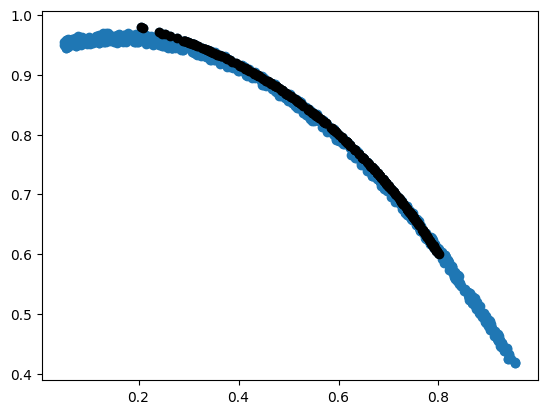

411 f(x) = [ 0.28852804 -0.89126423] 0.9462477120888172
412 f(x) = [ 0.29036766 -0.89320656] 0.945827828640725
413 f(x) = [ 0.29087991 -0.89357727] 0.9456688906003463
414 f(x) = [ 0.29051642 -0.89327497] 0.9457564524319015
415 f(x) = [ 0.28952042 -0.89225921] 0.9459775709273324
416 f(x) = [ 0.28952042 -0.89225921] 0.9459775709273324
417 f(x) = [ 0.28890622 -0.89144597] 0.9460522267286463
418 f(x) = [ 0.28859852 -0.89109581] 0.9461014377927714
419 f(x) = [ 0.28891025 -0.89150585] 0.9460343494554566
420 f(x) = [ 0.29054368 -0.89317831] 0.9456929493008323


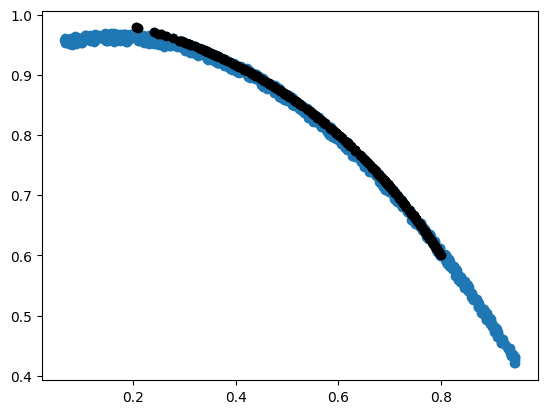

421 f(x) = [ 0.29060698 -0.8932421 ] 0.9456753568091005
422 f(x) = [ 0.29214158 -0.8947627 ] 0.9453104642372345
423 f(x) = [ 0.29157158 -0.89422531] 0.9454355819089808
424 f(x) = [ 0.29378143 -0.89632434] 0.9448934095108065
425 f(x) = [ 0.29386085 -0.89640244] 0.9448805406063345
426 f(x) = [ 0.29285608 -0.8952543 ] 0.9450634871890933
427 f(x) = [ 0.29363645 -0.89593972] 0.9448842558588297
428 f(x) = [ 0.29408641 -0.89634433] 0.9447771903315114
429 f(x) = [ 0.30235741 -0.90301679] 0.9423734188508299
430 f(x) = [ 0.30221813 -0.90289325] 0.9424052935379491


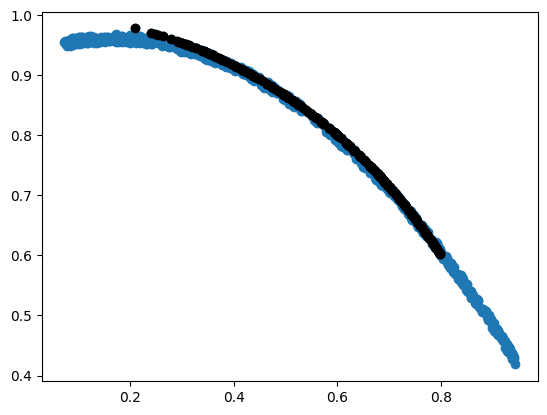

431 f(x) = [ 0.3013367  -0.90196344] 0.9426182265350228
432 f(x) = [ 0.30189299 -0.90247315] 0.9424634763305613
433 f(x) = [ 0.3009988  -0.90166302] 0.9426721578739299
434 f(x) = [ 0.30118943 -0.90187045] 0.9426327907407752
435 f(x) = [ 0.30043981 -0.90126086] 0.9428219796973869
436 f(x) = [ 0.30036382 -0.90114238] 0.9428349070248773
437 f(x) = [ 0.29969139 -0.90022671] 0.9429078356235172
438 f(x) = [ 0.29969139 -0.90022671] 0.9429078356235172
439 f(x) = [ 0.29890689 -0.89945258] 0.9430886575728904
440 f(x) = [ 0.30001361 -0.90054003] 0.9428296022110845


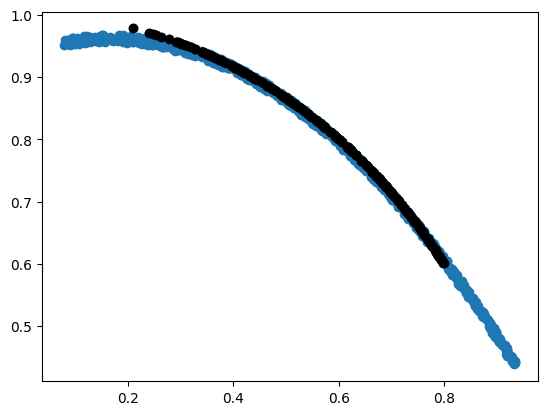

441 f(x) = [ 0.30068058 -0.90126332] 0.942681035497854
442 f(x) = [ 0.30083056 -0.90141469] 0.9426529410595829
443 f(x) = [ 0.30024835 -0.90088198] 0.9427824911623399
444 f(x) = [ 0.30110278 -0.90161667] 0.9425588067404995
445 f(x) = [ 0.30108667 -0.90164138] 0.9425711312859743
446 f(x) = [ 0.3014244  -0.90195619] 0.9424953058330473
447 f(x) = [ 0.30109201 -0.9015574 ] 0.9425633193570541
448 f(x) = [ 0.29952023 -0.89993977] 0.9429026500981911
449 f(x) = [ 0.30025625 -0.9006715 ] 0.9427638121753292
450 f(x) = [ 0.30001879 -0.90044257] 0.9428145216225228


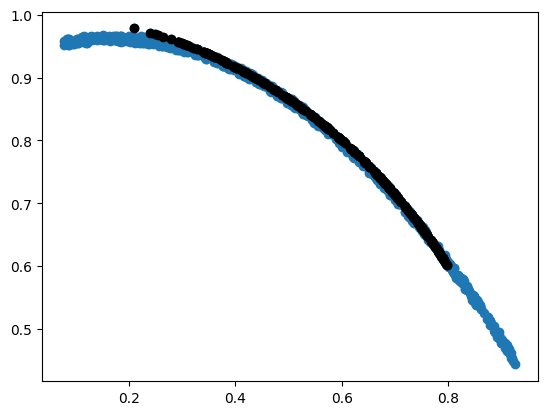

451 f(x) = [ 0.30004532 -0.90041527] 0.9427994650903786
452 f(x) = [ 0.29993901 -0.90031998] 0.9428255432159932
453 f(x) = [ 0.31034218 -0.90909691] 0.939896930863914
454 f(x) = [ 0.30992961 -0.90870624] 0.9400033566787642
455 f(x) = [ 0.3109231  -0.90973183] 0.9397607779466414
456 f(x) = [ 0.31032199 -0.90913795] 0.9398656580749187
457 f(x) = [ 0.30973114 -0.90853908] 0.9399745300590769
458 f(x) = [ 0.30956373 -0.90840047] 0.9400180887283196
459 f(x) = [ 0.30796609 -0.9067323 ] 0.9403773488118733
460 f(x) = [ 0.30817222 -0.90691934] 0.9403283403356665


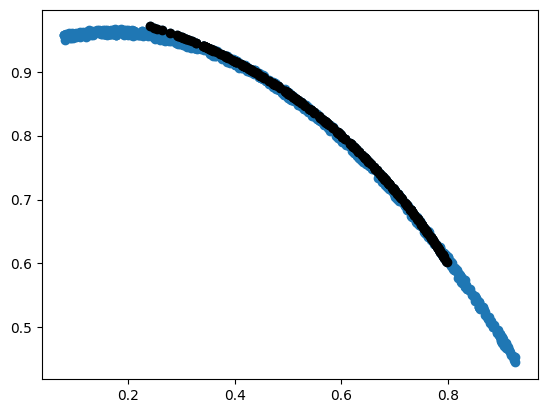

461 f(x) = [ 0.30761582 -0.90635103] 0.9404554346570889
462 f(x) = [ 0.30989655 -0.90857124] 0.939913059535533
463 f(x) = [ 0.30994971 -0.9086674 ] 0.939918934842271
464 f(x) = [ 0.30910464 -0.90790652] 0.9401094964305539
465 f(x) = [ 0.30910464 -0.90790652] 0.9401094964305539
466 f(x) = [ 0.30668048 -0.90540975] 0.9406290980330332
467 f(x) = [ 0.30616888 -0.90485652] 0.9407487028086015
468 f(x) = [ 0.30440496 -0.9030269 ] 0.94116443989198
469 f(x) = [ 0.30281686 -0.90155432] 0.9415525284943713
470 f(x) = [ 0.30449655 -0.90310199] 0.9411087682439933


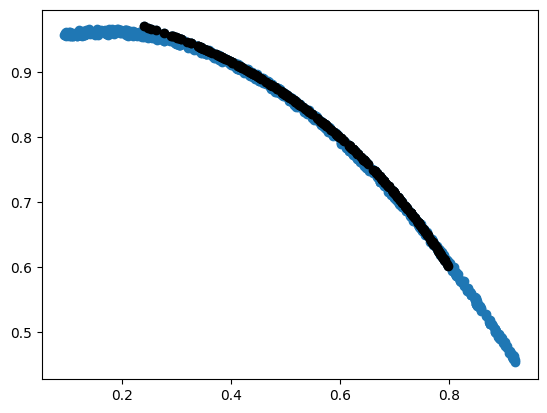

471 f(x) = [ 0.30527594 -0.90399498] 0.9409698599483804
472 f(x) = [ 0.3044003  -0.90306339] 0.9411562536825152
473 f(x) = [ 0.3053745  -0.90411371] 0.9409404153142947
474 f(x) = [ 0.30603324 -0.90473532] 0.9407924422575293
475 f(x) = [ 0.30567414 -0.90437588] 0.9408760109484803
476 f(x) = [ 0.3117875  -0.90952191] 0.9391560980182554
477 f(x) = [ 0.31141474 -0.90921661] 0.9392638215543256
478 f(x) = [ 0.31223811 -0.91019727] 0.9390910929269887
479 f(x) = [ 0.31223811 -0.91019727] 0.9390910929269887
480 f(x) = [ 0.31132781 -0.90938443] 0.9393122886111892


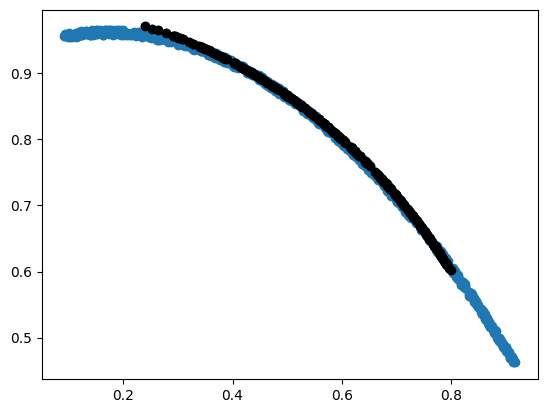

481 f(x) = [ 0.30996262 -0.90798658] 0.9396128980126734
482 f(x) = [ 0.30883466 -0.90702574] 0.9398961703156309
483 f(x) = [ 0.30902479 -0.90735265] 0.9398805547631536
484 f(x) = [ 0.30902479 -0.90735265] 0.9398805547631536
485 f(x) = [ 0.30934608 -0.90765016] 0.9398046952555603
486 f(x) = [ 0.31043376 -0.90874372] 0.9395881210982615
487 f(x) = [ 0.30991182 -0.90817942] 0.9397072468718711
488 f(x) = [ 0.30986707 -0.90813515] 0.939708197339357
489 f(x) = [ 0.30986707 -0.90813515] 0.939708197339357
490 f(x) = [ 0.30969885 -0.90797485] 0.9397324082196147


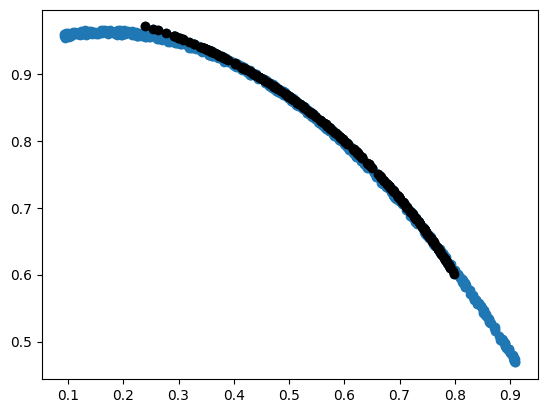

491 f(x) = [ 0.30956697 -0.90779889] 0.9397339740269863
492 f(x) = [ 0.30973769 -0.90793162] 0.939684106788275
493 f(x) = [ 0.30927136 -0.90736399] 0.9397553878155398
494 f(x) = [ 0.30903591 -0.90714118] 0.9398076999759607
495 f(x) = [ 0.30952182 -0.90771011] 0.9397047138701434
496 f(x) = [ 0.30880852 -0.90703218] 0.9398514880902743
497 f(x) = [ 0.30946054 -0.90773366] 0.9397350141179002
498 f(x) = [ 0.30997164 -0.90813108] 0.9395749752846406
499 f(x) = [ 0.30988094 -0.9080894 ] 0.9396083512969715
500 f(x) = [ 0.30952685 -0.90775346] 0.9397036632314913


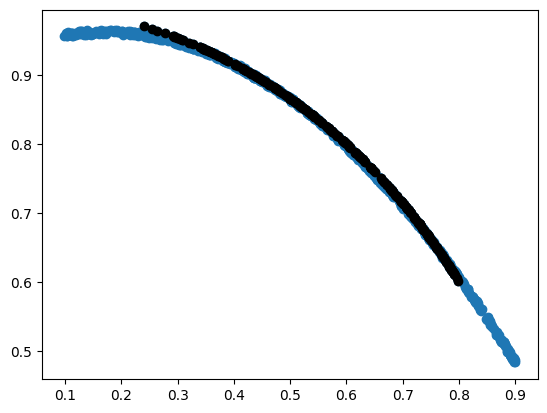

501 f(x) = [ 0.30924482 -0.90750818] 0.9397715259793531
502 f(x) = [ 0.3088638  -0.90718622] 0.9398654120497392
503 f(x) = [ 0.30845506 -0.90677633] 0.9399457879643021
504 f(x) = [ 0.30931992 -0.90731279] 0.93962749678875
505 f(x) = [ 0.30779375 -0.90576176] 0.9399769439165114
506 f(x) = [ 0.30756593 -0.90564141] 0.9400788858391192
507 f(x) = [ 0.30890521 -0.9070316 ] 0.9398013603522444
508 f(x) = [ 0.31126747 -0.90897105] 0.9391153284345545
509 f(x) = [ 0.30993253 -0.90764076] 0.9394018299952596
510 f(x) = [ 0.30993253 -0.90764076] 0.9394018299952596


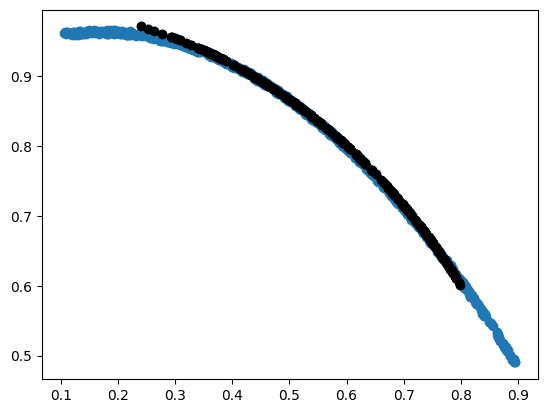

511 f(x) = [ 0.30934804 -0.90716777] 0.939552876606785
512 f(x) = [ 0.30916468 -0.90699764] 0.9395951141623834
513 f(x) = [ 0.30881328 -0.90670013] 0.9396913045050171
514 f(x) = [ 0.30935023 -0.9072307 ] 0.9395611046335698
515 f(x) = [ 0.30811348 -0.90609597] 0.9398606567010155
516 f(x) = [ 0.30752536 -0.90552442] 0.9399809252232123
517 f(x) = [ 0.30716736 -0.90522865] 0.9400789914833372
518 f(x) = [ 0.30766347 -0.90565311] 0.9399452312990823
519 f(x) = [ 0.30618755 -0.9041449 ] 0.9402850693676705
520 f(x) = [ 0.30587875 -0.90387251] 0.9403646179399555


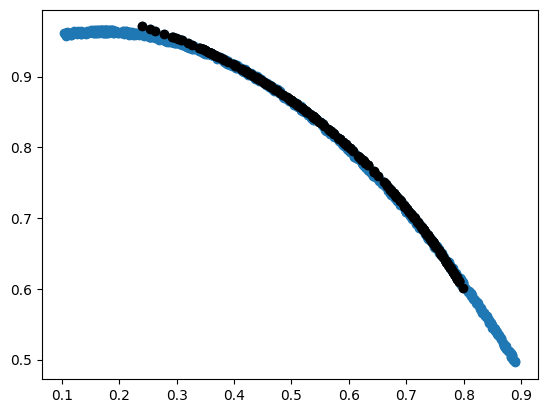

521 f(x) = [ 0.30597936 -0.90392373] 0.9403197875240574
522 f(x) = [ 0.30596464 -0.90393323] 0.9403205329276506
523 f(x) = [ 0.30881345 -0.90613533] 0.9394449118838614
524 f(x) = [ 0.3090508 -0.9063773] 0.9393915704953557
525 f(x) = [ 0.30899146 -0.90630141] 0.9394033194844044
526 f(x) = [ 0.31042275 -0.90744547] 0.9389693566235692
527 f(x) = [ 0.30947991 -0.90667978] 0.9392144144740134
528 f(x) = [ 0.30949901 -0.90670984] 0.9392170097205164
529 f(x) = [ 0.31542615 -0.9114524 ] 0.937456240493266
530 f(x) = [ 0.31641928 -0.91236919] 0.9371848019995869


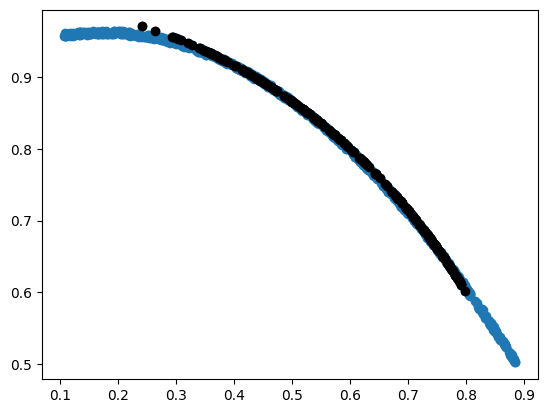

531 f(x) = [ 0.31820852 -0.91367722] 0.9366147077606781
532 f(x) = [ 0.31828273 -0.91375751] 0.9366034892671651
533 f(x) = [ 0.31828273 -0.91375751] 0.9366034892671651
534 f(x) = [ 0.31968005 -0.91516972] 0.936288551433185
535 f(x) = [ 0.3194689  -0.91497043] 0.936336628272692
536 f(x) = [ 0.3194689  -0.91497043] 0.936336628272692
537 f(x) = [ 0.31924514 -0.91476511] 0.9363798818929014
538 f(x) = [ 0.31924514 -0.91476511] 0.9363798818929014
539 f(x) = [ 0.31936171 -0.91491226] 0.9363605365669481
540 f(x) = [ 0.31952968 -0.91505016] 0.9363121283152782


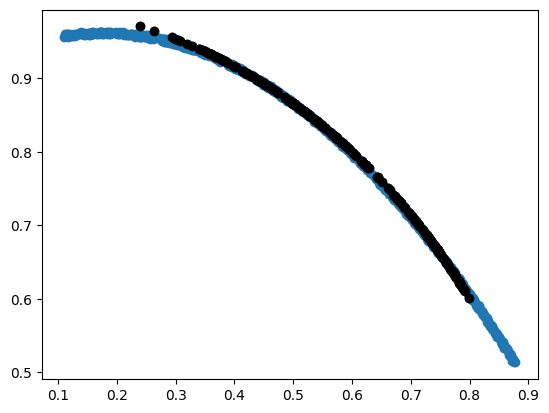

541 f(x) = [ 0.31792126 -0.91338935] 0.9366642401376156
542 f(x) = [ 0.31759936 -0.91301939] 0.9367323141766907
543 f(x) = [ 0.31747427 -0.91289164] 0.9367609393760334
544 f(x) = [ 0.31732876 -0.91278   ] 0.9367944826815295
545 f(x) = [ 0.31746254 -0.91288648] 0.9367574741083282
546 f(x) = [ 0.31730012 -0.91278013] 0.9368087881792538
547 f(x) = [ 0.31721264 -0.91266642] 0.9368135965570101
548 f(x) = [ 0.31671769 -0.91222873] 0.9369349071815494
549 f(x) = [ 0.31671283 -0.91221388] 0.9369341342216405
550 f(x) = [ 0.31634746 -0.91190613] 0.9370299776620945


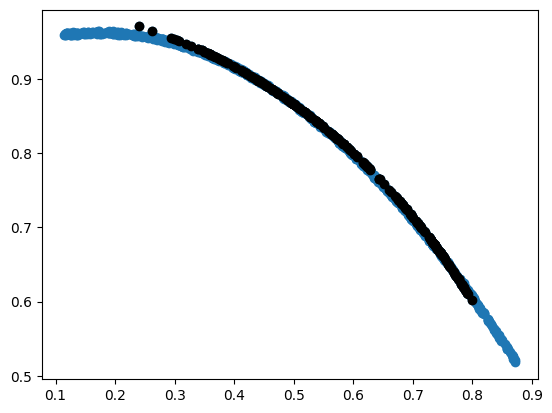

551 f(x) = [ 0.31623481 -0.91185305] 0.9370687361587569
552 f(x) = [ 0.31623481 -0.91185305] 0.9370687361587569
553 f(x) = [ 0.31623481 -0.91185305] 0.9370687361587569
554 f(x) = [ 0.31609445 -0.91178363] 0.9371321501356227
555 f(x) = [ 0.3160617  -0.91175157] 0.9371303732657947
556 f(x) = [ 0.31603341 -0.91175478] 0.9371468385228718
557 f(x) = [ 0.31621317 -0.91192172] 0.9371046281430025
558 f(x) = [ 0.31632432 -0.91217209] 0.9370978026158949
559 f(x) = [ 0.31645466 -0.9123098 ] 0.9370685623660806
560 f(x) = [ 0.31645466 -0.9123098 ] 0.9370685623660806


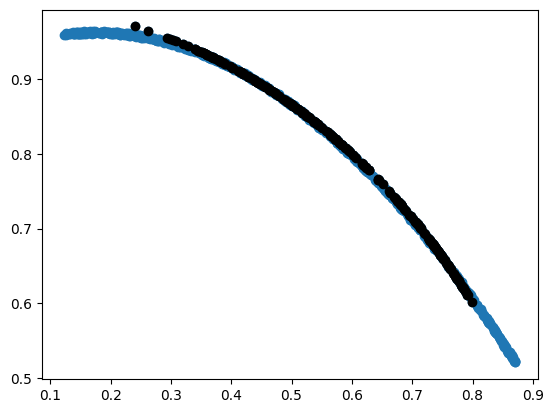

561 f(x) = [ 0.3162745  -0.91214818] 0.9371126365699964
562 f(x) = [ 0.3162745  -0.91214818] 0.9371126365699964
563 f(x) = [ 0.31656829 -0.91244075] 0.9370442339137044
564 f(x) = [ 0.31691424 -0.91272941] 0.9369470028138831
565 f(x) = [ 0.3169075 -0.9127329] 0.9369534095732847
566 f(x) = [ 0.3166467  -0.91252105] 0.9370295942407215
567 f(x) = [ 0.31605942 -0.91197258] 0.9371511278245321
568 f(x) = [ 0.31572233 -0.91167934] 0.9372255107406031
569 f(x) = [ 0.31465918 -0.91062798] 0.9374796766991699
570 f(x) = [ 0.31501486 -0.91090941] 0.9373783157561079


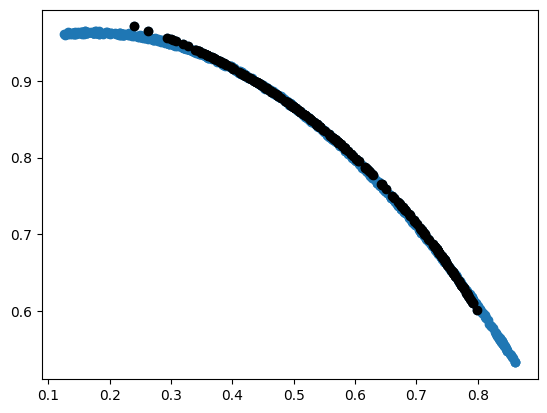

571 f(x) = [ 0.31452561 -0.91052546] 0.9375125242690763
572 f(x) = [ 0.31461324 -0.91068763] 0.9375051894398598
573 f(x) = [ 0.31407936 -0.91018277] 0.9376339403397805
574 f(x) = [ 0.31407936 -0.91018277] 0.9376339403397805
575 f(x) = [ 0.31407936 -0.91018277] 0.9376339403397805
576 f(x) = [ 0.31391843 -0.910003  ] 0.9376532245608294
577 f(x) = [ 0.31367702 -0.90983127] 0.9377211552730137
578 f(x) = [ 0.31393124 -0.91005582] 0.9376403558410025
579 f(x) = [ 0.31387345 -0.90999368] 0.9376494598746495
580 f(x) = [ 0.31388187 -0.9100016 ] 0.9376475290555314


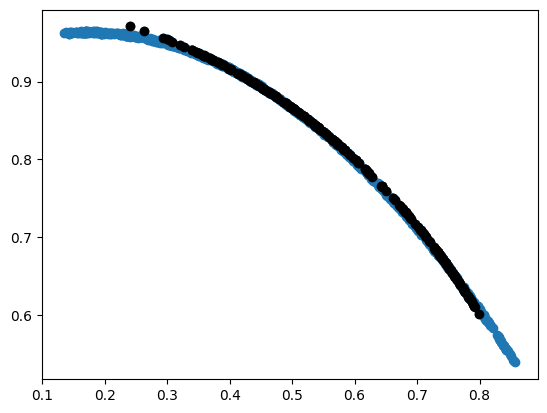

581 f(x) = [ 0.3144213  -0.91045743] 0.9374887015682354
582 f(x) = [ 0.31496903 -0.91094981] 0.9373528367800896
583 f(x) = [ 0.31425269 -0.91040847] 0.9375528444571573
584 f(x) = [ 0.31415592 -0.91033196] 0.937575302518364
585 f(x) = [ 0.31337409 -0.90947184] 0.937732960904084
586 f(x) = [ 0.312125   -0.90824903] 0.9380360056846773
587 f(x) = [ 0.31097845 -0.90711214] 0.9383092491874567
588 f(x) = [ 0.30945154 -0.90561329] 0.9386828893208025
589 f(x) = [ 0.30947251 -0.90570611] 0.9386995387226245
590 f(x) = [ 0.30963252 -0.90582397] 0.9386500377287668


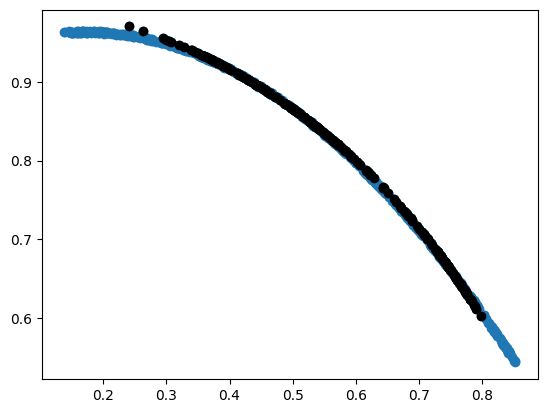

591 f(x) = [ 0.30965258 -0.90581811] 0.9386378792962944
592 f(x) = [ 0.30902175 -0.90517955] 0.938783364239101
593 f(x) = [ 0.30781946 -0.90398987] 0.9390634486971585
594 f(x) = [ 0.30976291 -0.90540409] 0.9384336679599525
595 f(x) = [ 0.30888215 -0.90464254] 0.9386579567643406
596 f(x) = [ 0.30686889 -0.90264861] 0.9391429051828395
597 f(x) = [ 0.30686186 -0.9026541 ] 0.9391502726578789
598 f(x) = [ 0.30723008 -0.90299205] 0.9390617740707434
599 f(x) = [ 0.30604679 -0.90186682] 0.9393470860447095
600 f(x) = [ 0.30613837 -0.90194676] 0.9393281831506732


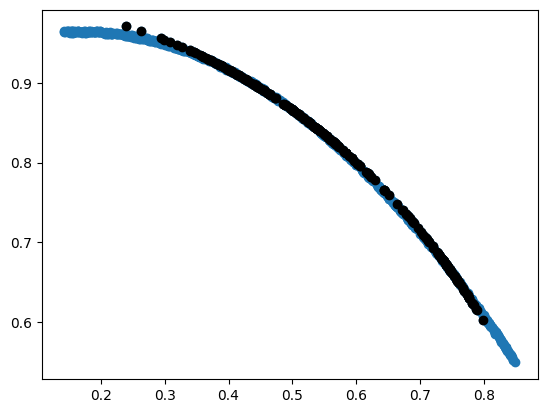

601 f(x) = [ 0.30823041 -0.90367669] 0.9387129047876392
602 f(x) = [ 0.30831361 -0.90375165] 0.9386897137061718
603 f(x) = [ 0.30788887 -0.90340067] 0.9387881314519517
604 f(x) = [ 0.30803754 -0.90351388] 0.9387388052446863
605 f(x) = [ 0.30898879 -0.90432493] 0.9384609700234943
606 f(x) = [ 0.30898879 -0.90432493] 0.9384609700234943
607 f(x) = [ 0.30843124 -0.90382045] 0.9386074907724768
608 f(x) = [ 0.30708005 -0.9025132 ] 0.9389416692192015
609 f(x) = [ 0.30653685 -0.90197437] 0.9390537925744361
610 f(x) = [ 0.30665577 -0.90205461] 0.9390110760051228


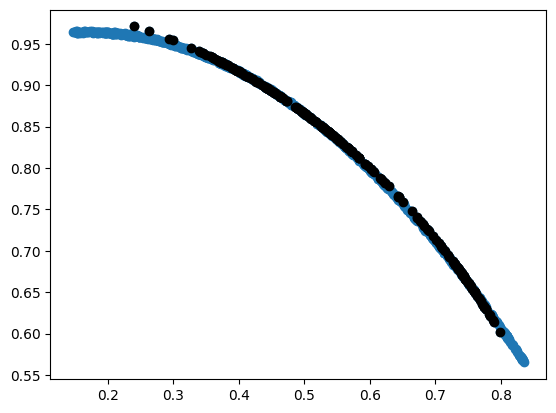

611 f(x) = [ 0.30621786 -0.90171396] 0.9391277325996953
612 f(x) = [ 0.30618435 -0.90167583] 0.9391316464309517
613 f(x) = [ 0.30618435 -0.90167583] 0.9391316464309517
614 f(x) = [ 0.30662697 -0.9021065 ] 0.9390274347941053
615 f(x) = [ 0.30658522 -0.90206345] 0.939037500199759
616 f(x) = [ 0.3059884  -0.90152982] 0.9391806449323916
617 f(x) = [ 0.30538702 -0.9010289 ] 0.9393379746897867
618 f(x) = [ 0.30536416 -0.90100561] 0.9393422876364036
619 f(x) = [ 0.30516571 -0.90081664] 0.9393834398795416
620 f(x) = [ 0.3050258  -0.90071772] 0.9394319754869387


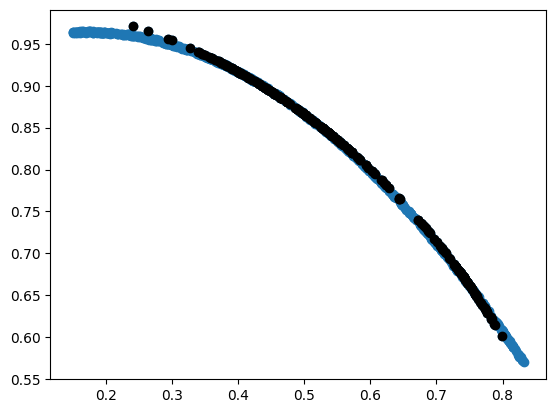

621 f(x) = [ 0.30424207 -0.89992208] 0.9396199786407259
622 f(x) = [ 0.30432574 -0.89996685] 0.9395721165750124
623 f(x) = [ 0.30473572 -0.90034787] 0.9394630929576399
624 f(x) = [ 0.30758122 -0.90272113] 0.9386304226144243
625 f(x) = [ 0.30758122 -0.90272113] 0.9386304226144243
626 f(x) = [ 0.30675507 -0.90203485] 0.938844986940113
627 f(x) = [ 0.30693374 -0.90220188] 0.9387930296163024
628 f(x) = [ 0.30711386 -0.90237036] 0.9387515584751662
629 f(x) = [ 0.30645846 -0.90168055] 0.938895603212672
630 f(x) = [ 0.30604847 -0.90140952] 0.9390318568313261


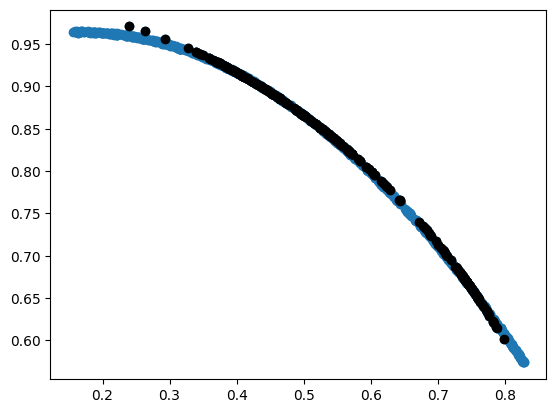

631 f(x) = [ 0.30580607 -0.90117802] 0.9390835003672346
632 f(x) = [ 0.30574329 -0.90113683] 0.9391001054960315
633 f(x) = [ 0.30561505 -0.90108507] 0.9391476410671321
634 f(x) = [ 0.30561505 -0.90108507] 0.9391476410671321
635 f(x) = [ 0.30522866 -0.90065608] 0.9392210695193979
636 f(x) = [ 0.30626161 -0.90149839] 0.9389181417765404
637 f(x) = [ 0.30561966 -0.90097739] 0.9390866902473808
638 f(x) = [ 0.30381506 -0.89934534] 0.9395471502708138
639 f(x) = [ 0.30349659 -0.89902511] 0.9396206195871027
640 f(x) = [ 0.30316473 -0.89870377] 0.9396964368908374


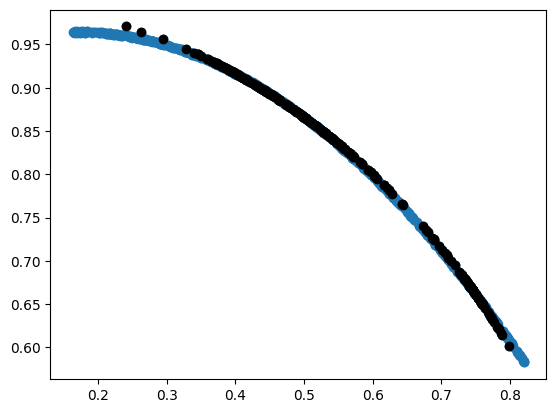

641 f(x) = [ 0.30313608 -0.89867541] 0.9397022361235953
642 f(x) = [ 0.30467923 -0.89992493] 0.9392442280483039
643 f(x) = [ 0.30449379 -0.8997618 ] 0.9392921178525819
644 f(x) = [ 0.30451127 -0.89979312] 0.9392895391990165
645 f(x) = [ 0.30451127 -0.89979312] 0.9392895391990165
646 f(x) = [ 0.30393449 -0.89918443] 0.9394164549239485
647 f(x) = [ 0.30393449 -0.89918443] 0.9394164549239485
648 f(x) = [ 0.30379825 -0.89906384] 0.9394508042423363
649 f(x) = [ 0.30379825 -0.89906384] 0.9394508042423363
650 f(x) = [ 0.30237342 -0.89764453] 0.9397824554933771


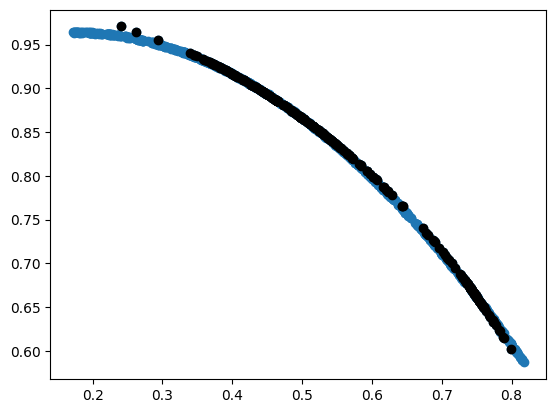

651 f(x) = [ 0.30240108 -0.89768513] 0.9397748149708646
652 f(x) = [ 0.30178466 -0.89718021] 0.9399441048210264
653 f(x) = [ 0.30179712 -0.89719547] 0.9399428758248956
654 f(x) = [ 0.30191231 -0.89728287] 0.9399057361587717
655 f(x) = [ 0.30068645 -0.8960136 ] 0.9401820835912831
656 f(x) = [ 0.30071546 -0.89605584] 0.9401796404599418
657 f(x) = [ 0.30056829 -0.89596651] 0.940230143344228
658 f(x) = [ 0.29889177 -0.89433591] 0.9406444142489223
659 f(x) = [ 0.29884713 -0.89434002] 0.9406589926981659
660 f(x) = [ 0.29891944 -0.89440155] 0.9406392091456202


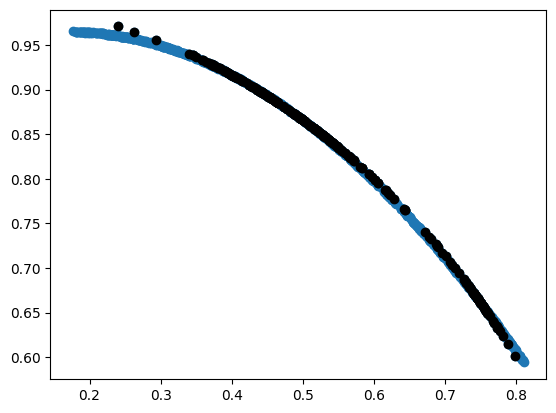

661 f(x) = [ 0.29923671 -0.89474681] 0.9405730793069738
662 f(x) = [ 0.29937975 -0.89493285] 0.9405540416056312
663 f(x) = [ 0.29925281 -0.89479812] 0.940578229712102
664 f(x) = [ 0.29855045 -0.89415974] 0.9407448114960382
665 f(x) = [ 0.29814666 -0.8938052 ] 0.9408498419624347
666 f(x) = [ 0.29814666 -0.8938052 ] 0.9408498419624347
667 f(x) = [ 0.29812261 -0.89381218] 0.9408596239407448
668 f(x) = [ 0.29806472 -0.89376695] 0.9408734709793899
669 f(x) = [ 0.29800825 -0.8937128 ] 0.9408858960679797
670 f(x) = [ 0.29776123 -0.89350641] 0.9409545360125745


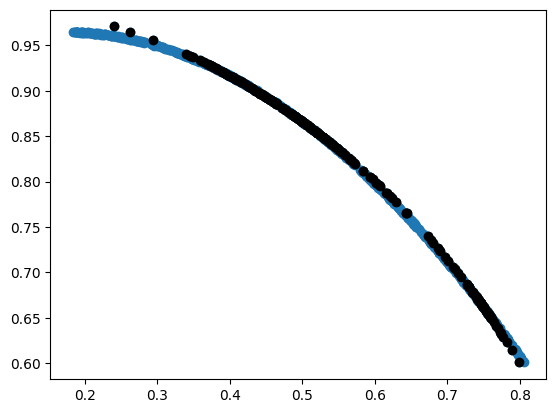

671 f(x) = [ 0.29775804 -0.89350812] 0.9409558273156478
672 f(x) = [ 0.29769418 -0.89344046] 0.9409661597141448
673 f(x) = [ 0.29778811 -0.89354111] 0.9409448676933736
674 f(x) = [ 0.29792803 -0.89370104] 0.9409200209294697
675 f(x) = [ 0.29723732 -0.8930857 ] 0.9410903837385662
676 f(x) = [ 0.29721564 -0.89307047] 0.9410978959529606
677 f(x) = [ 0.29696307 -0.89289279] 0.941167675206138
678 f(x) = [ 0.29710225 -0.89299818] 0.9411240211850047
679 f(x) = [ 0.29710225 -0.89299818] 0.9411240211850047
680 f(x) = [ 0.2971711  -0.89304819] 0.9411008860058224


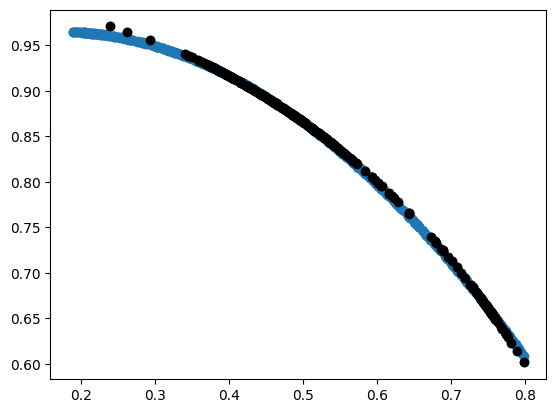

681 f(x) = [ 0.29699695 -0.89295829] 0.9411649918358634
682 f(x) = [ 0.29694781 -0.89290353] 0.9411716462594092
683 f(x) = [ 0.29678668 -0.89280054] 0.9412239607838744
684 f(x) = [ 0.29690287 -0.89290752] 0.9411894302117001
685 f(x) = [ 0.29655443 -0.8926585 ] 0.9412882773423293
686 f(x) = [ 0.29595528 -0.89213249] 0.941440474609272
687 f(x) = [ 0.29595528 -0.89213249] 0.941440474609272
688 f(x) = [ 0.29545613 -0.89164937] 0.9415567303394866
689 f(x) = [ 0.30001097 -0.89541105] 0.9402396968924833
690 f(x) = [ 0.30003789 -0.89544198] 0.9402304587460518


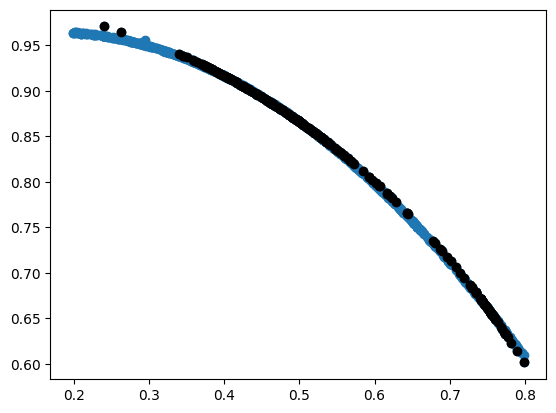

691 f(x) = [ 0.29904765 -0.89466039] 0.9405105257471924
692 f(x) = [ 0.29890044 -0.89454907] 0.9405573145425583
693 f(x) = [ 0.29903041 -0.89466814] 0.9405262879695313
694 f(x) = [ 0.29918328 -0.89480396] 0.9404874362946606
695 f(x) = [ 0.29896052 -0.89463833] 0.940542018195828
696 f(x) = [ 0.29900656 -0.89471693] 0.9405372777515755
697 f(x) = [ 0.2993523  -0.89498374] 0.9404281978220186
698 f(x) = [ 0.2993523  -0.89498374] 0.9404281978220186
699 f(x) = [ 0.2993523  -0.89498374] 0.9404281978220186
700 f(x) = [ 0.29842973 -0.89422649] 0.9406838217972868


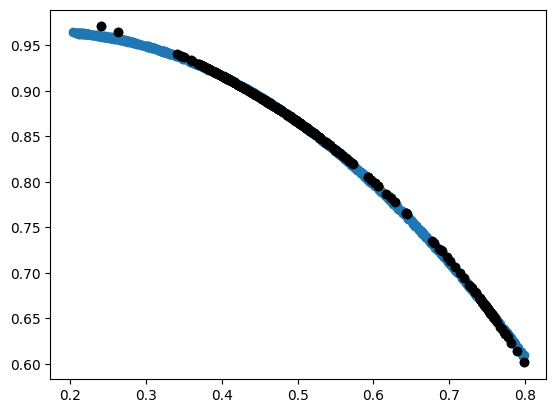

701 f(x) = [ 0.29837708 -0.89424913] 0.9407112159386158
702 f(x) = [ 0.29837708 -0.89424913] 0.9407112159386158
703 f(x) = [ 0.29840882 -0.8942722 ] 0.9407005060372442
704 f(x) = [ 0.2980021  -0.89393231] 0.9408075842046494
705 f(x) = [ 0.29799106 -0.89392192] 0.9408100709352362
706 f(x) = [ 0.29763579 -0.89361049] 0.940900753342407
707 f(x) = [ 0.29763579 -0.89361049] 0.940900753342407
708 f(x) = [ 0.29763579 -0.89361049] 0.940900753342407
709 f(x) = [ 0.29770552 -0.89367922] 0.940886992270143
710 f(x) = [ 0.29699133 -0.89295304] 0.9410531772641954


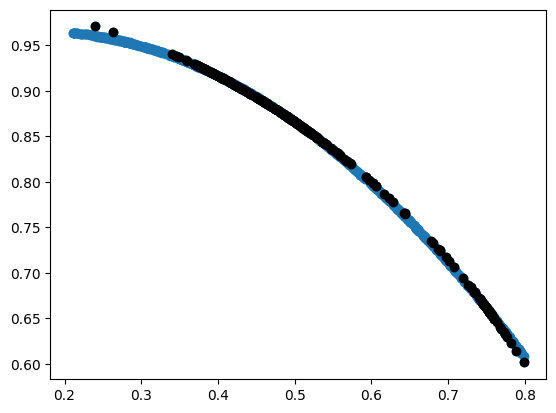

711 f(x) = [ 0.29708609 -0.8930398 ] 0.9410269909517934
712 f(x) = [ 0.29722404 -0.89316269] 0.9409921159597094
713 f(x) = [ 0.29724919 -0.89318862] 0.9409875272793412
714 f(x) = [ 0.29721061 -0.89316398] 0.9410021383201325
715 f(x) = [ 0.29721061 -0.89316398] 0.9410021383201325
716 f(x) = [ 0.29651341 -0.89243201] 0.9411615669001572
717 f(x) = [ 0.29585722 -0.89189025] 0.9413408803927751
718 f(x) = [ 0.29585722 -0.89189025] 0.9413408803927751
719 f(x) = [ 0.29600111 -0.89206758] 0.9413126451980367
720 f(x) = [ 0.29527889 -0.89145521] 0.9414982100494176


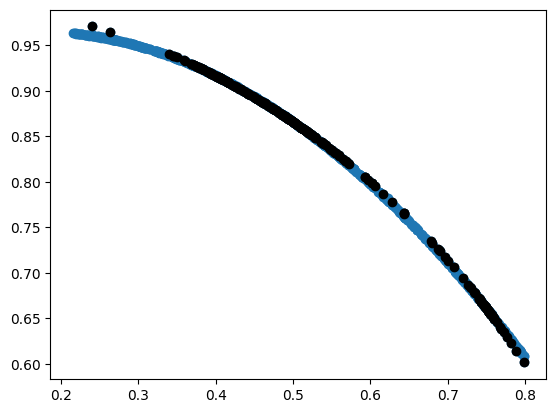

721 f(x) = [ 0.29527889 -0.89145521] 0.9414982100494176
722 f(x) = [ 0.29469359 -0.89095633] 0.9416503727823851
723 f(x) = [ 0.29332235 -0.88958978] 0.9419839226370008
724 f(x) = [ 0.29327572 -0.88954048] 0.9419911465075703
725 f(x) = [ 0.2931963 -0.8894381] 0.9420044903244933
726 f(x) = [ 0.29320195 -0.88943817] 0.9420015512564773
727 f(x) = [ 0.29326763 -0.88951795] 0.9419905516668602
728 f(x) = [ 0.29338442 -0.88962415] 0.9419621192611386
729 f(x) = [ 0.29320854 -0.88949838] 0.9420215243358119
730 f(x) = [ 0.29304364 -0.88933362] 0.9420595906496584


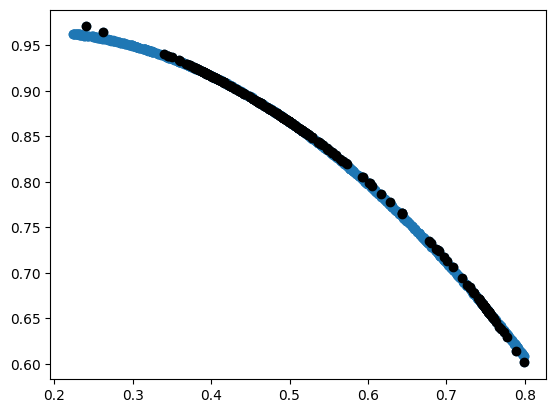

731 f(x) = [ 0.29310571 -0.88939176] 0.9420445819326648
732 f(x) = [ 0.29298729 -0.88928838] 0.9420751201535373
733 f(x) = [ 0.29311013 -0.88939876] 0.9420449290825702
734 f(x) = [ 0.29229453 -0.88871082] 0.9422625770386541
735 f(x) = [ 0.29229453 -0.88871082] 0.9422625770386541
736 f(x) = [ 0.29235534 -0.88877363] 0.9422517230431804
737 f(x) = [ 0.29235534 -0.88877363] 0.9422517230431804
738 f(x) = [ 0.29235534 -0.88877363] 0.9422517230431804
739 f(x) = [ 0.29232497 -0.88875551] 0.9422638835336978
740 f(x) = [ 0.29232497 -0.88875551] 0.9422638835336978


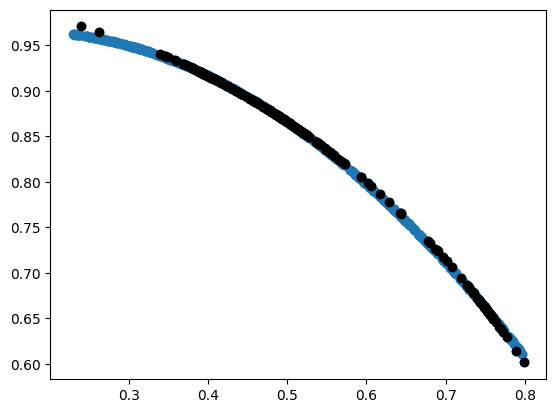

741 f(x) = [ 0.29237602 -0.88878466] 0.9422449680347327
742 f(x) = [ 0.29229512 -0.8887261 ] 0.9422724414022543
743 f(x) = [ 0.29229512 -0.8887261 ] 0.9422724414022543
744 f(x) = [ 0.29236855 -0.88879095] 0.9422537225339207
745 f(x) = [ 0.2922095  -0.88866163] 0.9423001508354529
746 f(x) = [ 0.29211817 -0.88857966] 0.9423226800132211
747 f(x) = [ 0.2917663  -0.88828016] 0.9424164030592428
748 f(x) = [ 0.2917663  -0.88828016] 0.9424164030592428
749 f(x) = [ 0.29180794 -0.88832348] 0.9424090810458609
750 f(x) = [ 0.29170924 -0.88823751] 0.9424349005994112


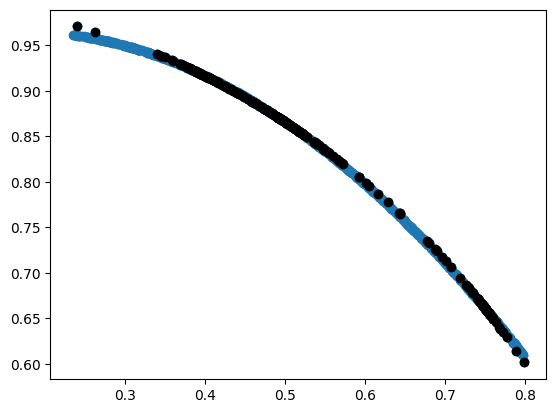

751 f(x) = [ 0.29102374 -0.88763557] 0.9426141925412015
752 f(x) = [ 0.29060681 -0.88718465] 0.9427061536189761
753 f(x) = [ 0.29060681 -0.88718465] 0.9427061536189761
754 f(x) = [ 0.29077791 -0.88733123] 0.9426599403924472
755 f(x) = [ 0.29005737 -0.88672798] 0.9428546056747378
756 f(x) = [ 0.29005737 -0.88672798] 0.9428546056747378
757 f(x) = [ 0.28986659 -0.88655785] 0.942907420227888
758 f(x) = [ 0.28946972 -0.88621795] 0.943012070536011
759 f(x) = [ 0.28946972 -0.88621795] 0.943012070536011
760 f(x) = [ 0.28928614 -0.88605591] 0.943058563708654


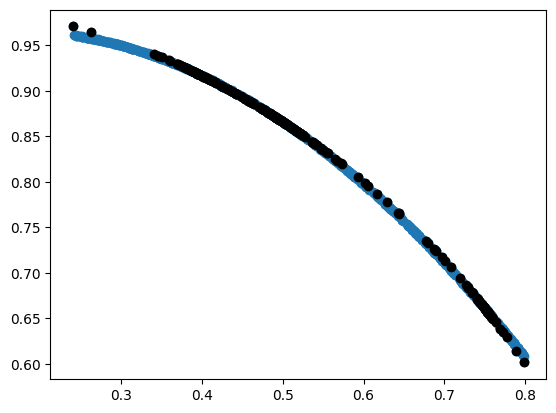

761 f(x) = [ 0.28906616 -0.88586629] 0.9431170210622734
762 f(x) = [ 0.28834484 -0.8852417 ] 0.9433029713322305
763 f(x) = [ 0.28818672 -0.88518161] 0.9433580365635106
764 f(x) = [ 0.28808152 -0.8850865 ] 0.9433836459454514
765 f(x) = [ 0.28799211 -0.88500601] 0.9434055786752154
766 f(x) = [ 0.2880198  -0.88503263] 0.9433996026633006
767 f(x) = [ 0.28798736 -0.88502418] 0.9434151588735773
768 f(x) = [ 0.28808569 -0.88514084] 0.9433949306401115
769 f(x) = [ 0.28810238 -0.88515697] 0.9433920324696468
770 f(x) = [ 0.28810238 -0.88515697] 0.9433920324696468


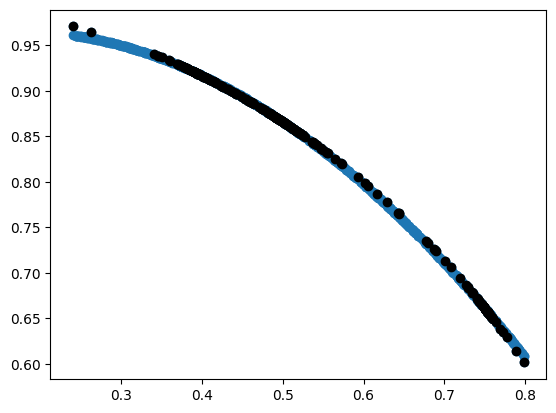

771 f(x) = [ 0.28793162 -0.88502093] 0.9434434645345918
772 f(x) = [ 0.28793162 -0.88502093] 0.9434434645345918
773 f(x) = [ 0.28806944 -0.885142  ] 0.9434077413909591
774 f(x) = [ 0.28797933 -0.88506831] 0.9434337260943328
775 f(x) = [ 0.28763676 -0.88480026] 0.943538918229855
776 f(x) = [ 0.28774555 -0.88494093] 0.9435188048538103
777 f(x) = [ 0.2876786  -0.88488597] 0.9435381087149751
778 f(x) = [ 0.28774036 -0.88496432] 0.9435262698408556
779 f(x) = [ 0.28726574 -0.88456592] 0.9436536017008177
780 f(x) = [ 0.28727537 -0.88457601] 0.9436511568683671


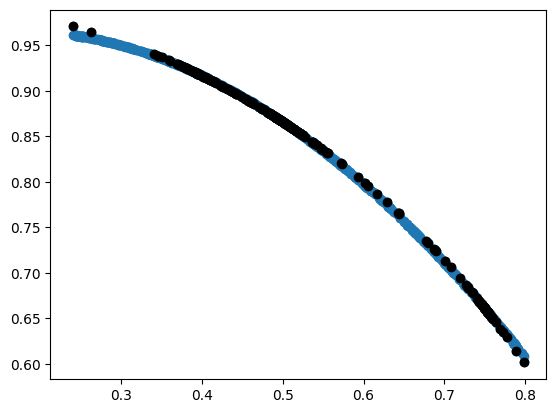

781 f(x) = [ 0.28727537 -0.88457601] 0.9436511568683671
782 f(x) = [ 0.28727537 -0.88457601] 0.9436511568683671
783 f(x) = [ 0.2873884  -0.88466748] 0.94361788111345
784 f(x) = [ 0.28659996 -0.88405417] 0.9438434739717307
785 f(x) = [ 0.28659996 -0.88405417] 0.9438434739717307
786 f(x) = [ 0.28665377 -0.88409419] 0.9438256808342677
787 f(x) = [ 0.28666852 -0.88411325] 0.9438249641152399
788 f(x) = [ 0.28666852 -0.88411325] 0.9438249641152399
789 f(x) = [ 0.28672852 -0.88417346] 0.943813377238949
790 f(x) = [ 0.28642298 -0.88391941] 0.9438975988975014


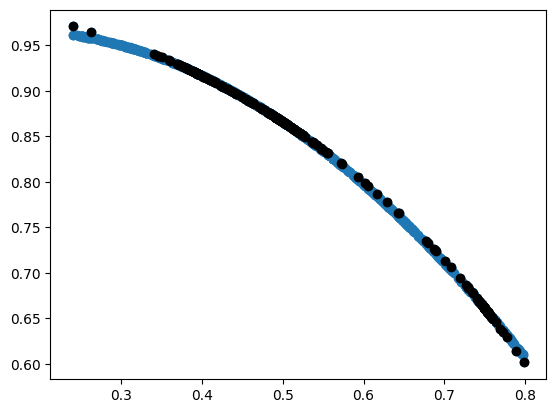

791 f(x) = [ 0.28652085 -0.88399816] 0.9438685463438485
792 f(x) = [ 0.28657365 -0.88403749] 0.9438511108022939
793 f(x) = [ 0.28657365 -0.88403749] 0.9438511108022939
794 f(x) = [ 0.28627574 -0.88379064] 0.9439347219601495
795 f(x) = [ 0.28670449 -0.88413718] 0.9438074567968442
796 f(x) = [ 0.28670449 -0.88413718] 0.9438074567968442
797 f(x) = [ 0.28673455 -0.88415873] 0.9437977330713747
798 f(x) = [ 0.28673455 -0.88415873] 0.9437977330713747
799 f(x) = [ 0.28673455 -0.88415873] 0.9437977330713747
800 f(x) = [ 0.28678087 -0.88420099] 0.9437866860797732


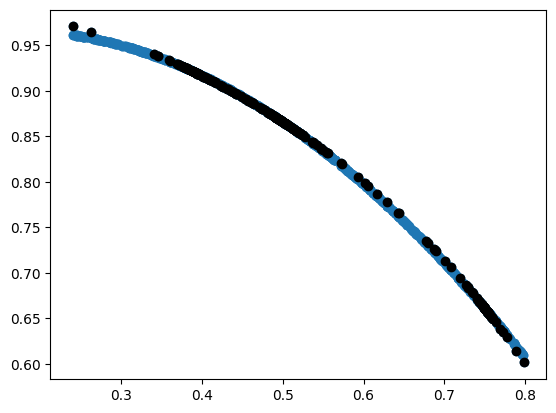

801 f(x) = [ 0.28678339 -0.88420277] 0.9437857959350885
802 f(x) = [ 0.28689237 -0.88429238] 0.9437540483027911
803 f(x) = [ 0.28689237 -0.88429238] 0.9437540483027911
804 f(x) = [ 0.28687554 -0.88427364] 0.9437578318909019
805 f(x) = [ 0.28677543 -0.8841979 ] 0.9437899437637446
806 f(x) = [ 0.28755774 -0.88483938] 0.9435625806602392
807 f(x) = [ 0.28755774 -0.88483938] 0.9435625806602392
808 f(x) = [ 0.2875474  -0.88489955] 0.9435785484311975
809 f(x) = [ 0.28756978 -0.88494446] 0.9435766717267907
810 f(x) = [ 0.28754234 -0.88492402] 0.9435856650956206


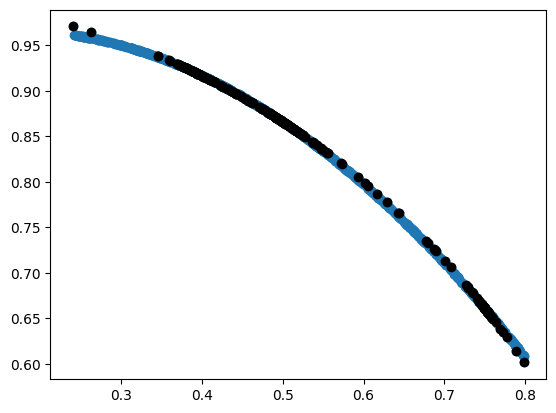

811 f(x) = [ 0.28745381 -0.88484651] 0.9436083487475533
812 f(x) = [ 0.28752371 -0.88491143] 0.9435920967011582
813 f(x) = [ 0.28752371 -0.88491143] 0.9435920967011582
814 f(x) = [ 0.28752371 -0.88491143] 0.9435920967011582
815 f(x) = [ 0.28692509 -0.88429671] 0.9437333160852843
816 f(x) = [ 0.28692509 -0.88429671] 0.9437333160852843
817 f(x) = [ 0.28690832 -0.8842926 ] 0.9437431023444512
818 f(x) = [ 0.28690832 -0.8842926 ] 0.9437431023444512
819 f(x) = [ 0.28690832 -0.8842926 ] 0.9437431023444512
820 f(x) = [ 0.28690832 -0.8842926 ] 0.9437431023444512


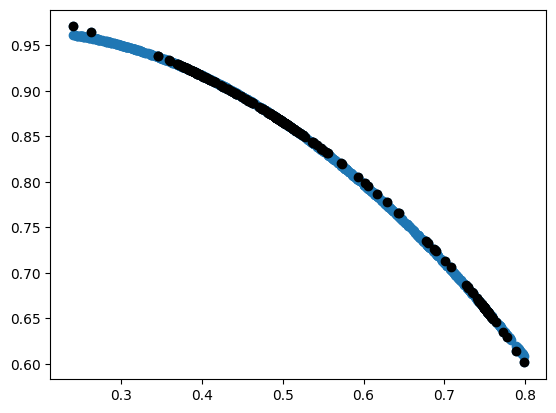

821 f(x) = [ 0.29628293 -0.89216558] 0.9411041821554723
822 f(x) = [ 0.29637484 -0.89225542] 0.9410834058649029
823 f(x) = [ 0.29637484 -0.89225542] 0.9410834058649029
824 f(x) = [ 0.29621266 -0.8921036 ] 0.9411253288958944
825 f(x) = [ 0.29621266 -0.8921036 ] 0.9411253288958944
826 f(x) = [ 0.29621266 -0.8921036 ] 0.9411253288958944
827 f(x) = [ 0.29621266 -0.8921036 ] 0.9411253288958944
828 f(x) = [ 0.29599485 -0.89191514] 0.9411821929227209
829 f(x) = [ 0.29587712 -0.89179535] 0.9412097646670101
830 f(x) = [ 0.29599499 -0.89190156] 0.9411806791251565


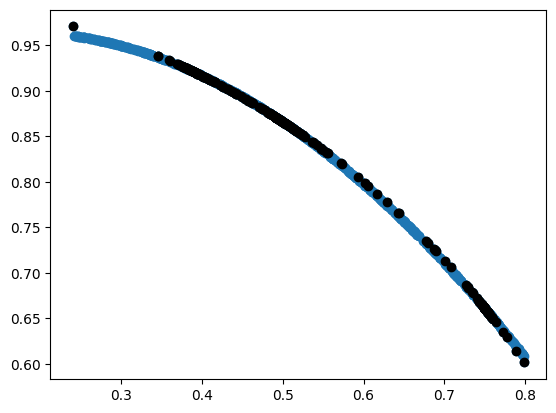

831 f(x) = [ 0.29602213 -0.89193275] 0.9411774012183252
832 f(x) = [ 0.29607611 -0.89198175] 0.941164341301995
833 f(x) = [ 0.29597444 -0.89190031] 0.9411946956924075
834 f(x) = [ 0.29597444 -0.89190031] 0.9411946956924075
835 f(x) = [ 0.29598805 -0.89191047] 0.9411903931962916
836 f(x) = [ 0.29617601 -0.89208378] 0.9411416743376995
837 f(x) = [ 0.29536886 -0.8914421 ] 0.9413663385938469
838 f(x) = [ 0.29542106 -0.89149143] 0.9413546554338889
839 f(x) = [ 0.29552038 -0.89158517] 0.9413309205526856
840 f(x) = [ 0.29552038 -0.89158517] 0.9413309205526856


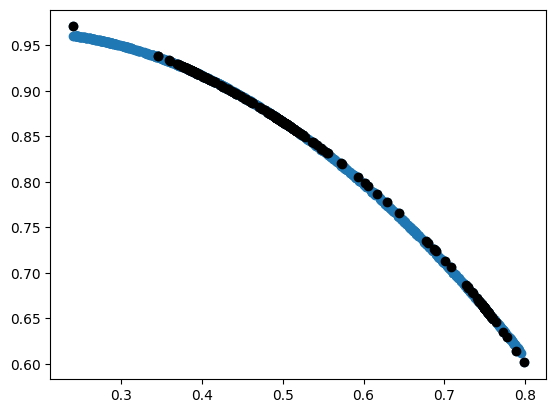

841 f(x) = [ 0.2954763  -0.89154627] 0.9413420744584537
842 f(x) = [ 0.29551629 -0.89158211] 0.941332175702096
843 f(x) = [ 0.29551629 -0.89158211] 0.941332175702096
844 f(x) = [ 0.29551652 -0.89158366] 0.9413327367211395
845 f(x) = [ 0.29548962 -0.89156711] 0.9413427650450052
846 f(x) = [ 0.29548962 -0.89156711] 0.9413427650450052
847 f(x) = [ 0.29548962 -0.89156711] 0.9413427650450052
848 f(x) = [ 0.29548962 -0.89156711] 0.9413427650450052
849 f(x) = [ 0.29548962 -0.89156711] 0.9413427650450052
850 f(x) = [ 0.29553857 -0.89161031] 0.9413303162828419


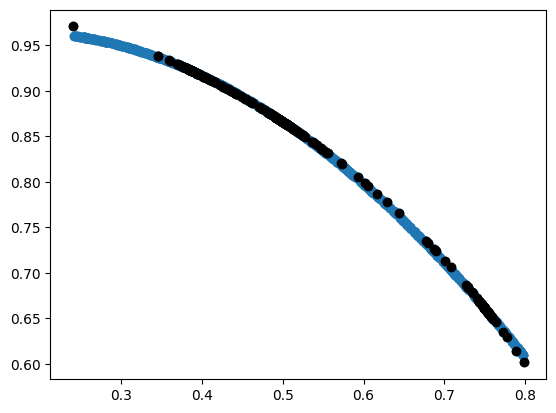

851 f(x) = [ 0.29547164 -0.89153699] 0.9413452823723885
852 f(x) = [ 0.29547164 -0.89153699] 0.9413452823723885
853 f(x) = [ 0.29550679 -0.89156817] 0.9413364336537025
854 f(x) = [ 0.29550679 -0.89156817] 0.9413364336537025
855 f(x) = [ 0.29545098 -0.89152484] 0.941353856694757
856 f(x) = [ 0.29545311 -0.89152463] 0.9413521416218195
857 f(x) = [ 0.29545311 -0.89152463] 0.9413521416218195
858 f(x) = [ 0.29549531 -0.89156215] 0.9413415590090543
859 f(x) = [ 0.29540999 -0.8914958 ] 0.9413680933194358
860 f(x) = [ 0.29540999 -0.8914958 ] 0.9413680933194358


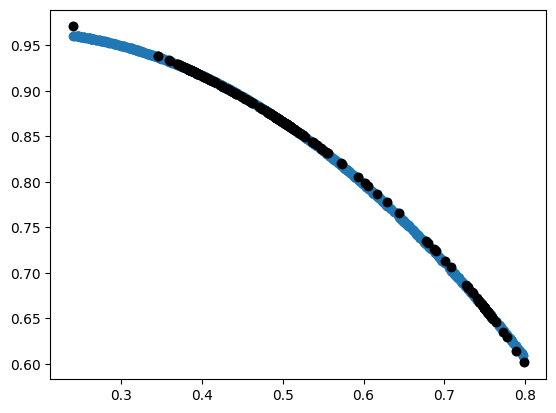

861 f(x) = [ 0.29516325 -0.89128185] 0.9414322453461774
862 f(x) = [ 0.29516325 -0.89128185] 0.9414322453461774
863 f(x) = [ 0.29516325 -0.89128185] 0.9414322453461774
864 f(x) = [ 0.29516325 -0.89128185] 0.9414322453461774
865 f(x) = [ 0.29515655 -0.89127588] 0.9414339174940907
866 f(x) = [ 0.29512966 -0.89126429] 0.9414470751164603
867 f(x) = [ 0.29486261 -0.89103214] 0.941515686730028
868 f(x) = [ 0.29486261 -0.89103214] 0.941515686730028
869 f(x) = [ 0.29485572 -0.89102895] 0.9415178442972317
870 f(x) = [ 0.29485572 -0.89102895] 0.9415178442972317


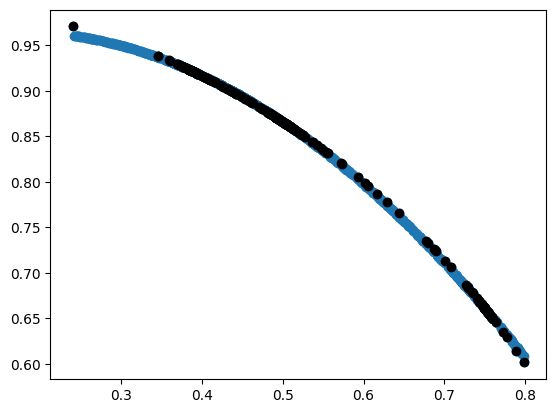

871 f(x) = [ 0.29485572 -0.89102895] 0.9415178442972317
872 f(x) = [ 0.29485572 -0.89102895] 0.9415178442972317
873 f(x) = [ 0.2946797  -0.89087723] 0.9415650216157536
874 f(x) = [ 0.29467517 -0.89087193] 0.9415659523609535
875 f(x) = [ 0.29462075 -0.89082448] 0.9415798809624532
876 f(x) = [ 0.29462075 -0.89082448] 0.9415798809624532
877 f(x) = [ 0.29462075 -0.89082448] 0.9415798809624532
878 f(x) = [ 0.29454137 -0.89073118] 0.9415958779778827
879 f(x) = [ 0.29454137 -0.89073118] 0.9415958779778827
880 f(x) = [ 0.29460756 -0.89079116] 0.9415798060474397


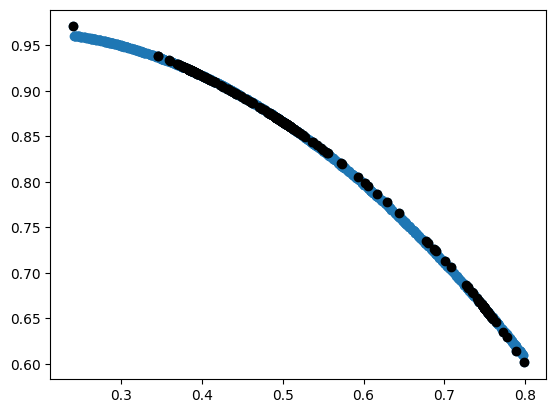

881 f(x) = [ 0.29476569 -0.8909192 ] 0.9415329885982976
882 f(x) = [ 0.29476569 -0.8909192 ] 0.9415329885982976
883 f(x) = [ 0.29460169 -0.89072518] 0.9415661404984829
884 f(x) = [ 0.29460169 -0.89072518] 0.9415661404984829
885 f(x) = [ 0.29460169 -0.89072518] 0.9415661404984829
886 f(x) = [ 0.29460169 -0.89072518] 0.9415661404984829
887 f(x) = [ 0.29458623 -0.89071135] 0.9415700389544783
888 f(x) = [ 0.29469601 -0.8908062 ] 0.9415409596151088
889 f(x) = [ 0.29469601 -0.8908062 ] 0.9415409596151088
890 f(x) = [ 0.29469601 -0.8908062 ] 0.9415409596151088


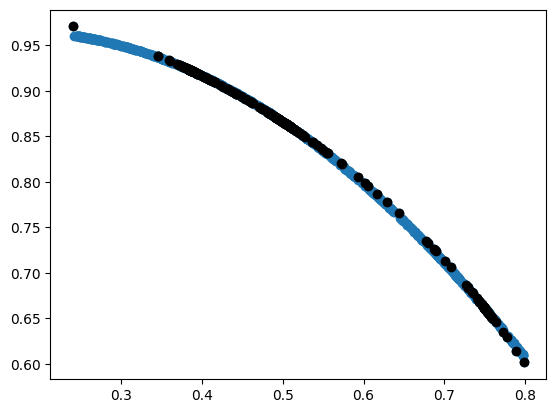

891 f(x) = [ 0.29469601 -0.8908062 ] 0.9415409596151088
892 f(x) = [ 0.2947126  -0.89081901] 0.9415357188697167
893 f(x) = [ 0.29480574 -0.8909693 ] 0.9415241187787358
894 f(x) = [ 0.29480574 -0.8909693 ] 0.9415241187787358
895 f(x) = [ 0.29454138 -0.89074144] 0.9415933504580041
896 f(x) = [ 0.29432282 -0.89051101] 0.9416436928904655
897 f(x) = [ 0.29432282 -0.89051101] 0.9416436928904655
898 f(x) = [ 0.29432282 -0.89051101] 0.9416436928904655
899 f(x) = [ 0.29432282 -0.89051101] 0.9416436928904655
900 f(x) = [ 0.29429922 -0.89049156] 0.9416499107839618


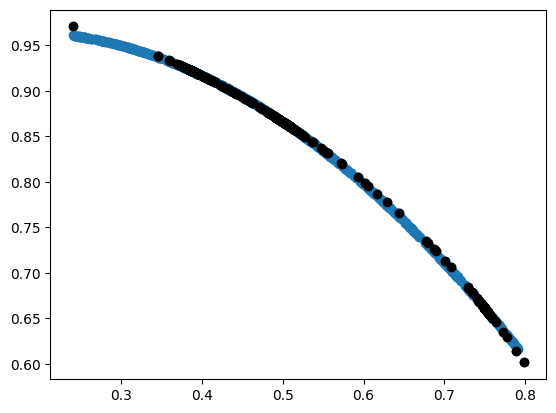

901 f(x) = [ 0.29347712 -0.88984456] 0.9418807097682472
902 f(x) = [ 0.29347712 -0.88984456] 0.9418807097682472
903 f(x) = [ 0.29347712 -0.88984456] 0.9418807097682472
904 f(x) = [ 0.29349283 -0.88987425] 0.9418838637164975
905 f(x) = [ 0.29353608 -0.88991156] 0.9418723925676435
906 f(x) = [ 0.2935756  -0.88994672] 0.9418624972693317
907 f(x) = [ 0.2935756  -0.88994672] 0.9418624972693317
908 f(x) = [ 0.2935756  -0.88994672] 0.9418624972693317
909 f(x) = [ 0.2935756  -0.88994672] 0.9418624972693317
910 f(x) = [ 0.29355587 -0.88992926] 0.9418674764959938


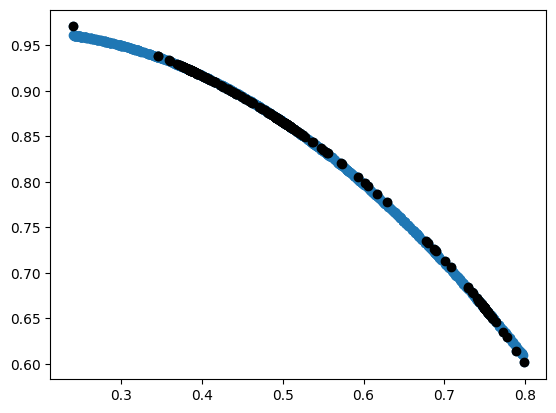

911 f(x) = [ 0.29361661 -0.88998282] 0.9418518902301943
912 f(x) = [ 0.29359937 -0.88998065] 0.9418630331613294
913 f(x) = [ 0.29348356 -0.88988984] 0.941898622272175
914 f(x) = [ 0.29345771 -0.88986114] 0.9419043286600188
915 f(x) = [ 0.29345771 -0.88986114] 0.9419043286600188
916 f(x) = [ 0.29350006 -0.8898989 ] 0.9418937613110029
917 f(x) = [ 0.2934549  -0.88985911] 0.9419052411136286
918 f(x) = [ 0.2934549  -0.88985911] 0.9419052411136286
919 f(x) = [ 0.2934549  -0.88985911] 0.9419052411136286
920 f(x) = [ 0.29383364 -0.89018163] 0.9417974713255605


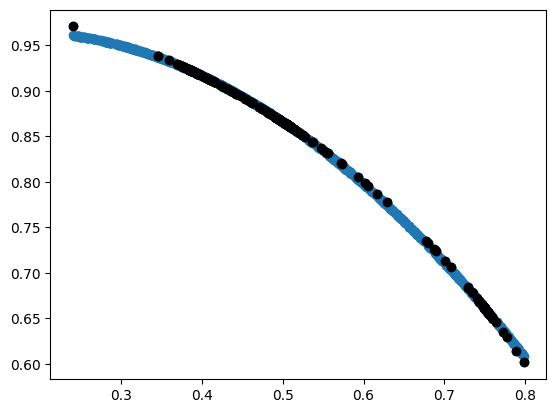

921 f(x) = [ 0.29391274 -0.8902507 ] 0.9417769097471388
922 f(x) = [ 0.29391274 -0.8902507 ] 0.9417769097471388
923 f(x) = [ 0.29392657 -0.89026294] 0.9417734176360573
924 f(x) = [ 0.29286257 -0.88917762] 0.9420277097187272
925 f(x) = [ 0.29288136 -0.88919368] 0.9420228934367894
926 f(x) = [ 0.29292988 -0.88923739] 0.9420109899386626
927 f(x) = [ 0.29292988 -0.88923739] 0.9420109899386626
928 f(x) = [ 0.29294679 -0.8892524 ] 0.9420067362209089
929 f(x) = [ 0.29264188 -0.88910781] 0.9421105157467216
930 f(x) = [ 0.2926489  -0.88911641] 0.9421090884581951


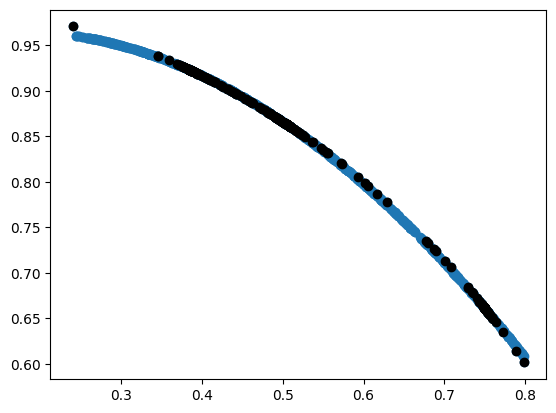

931 f(x) = [ 0.2926489  -0.88911641] 0.9421090884581951
932 f(x) = [ 0.2926489  -0.88911641] 0.9421090884581951
933 f(x) = [ 0.2926489  -0.88911641] 0.9421090884581951
934 f(x) = [ 0.29180173 -0.88824832] 0.9423100201998682
935 f(x) = [ 0.29180173 -0.88824832] 0.9423100201998682
936 f(x) = [ 0.2918478  -0.88828957] 0.9422985978652741
937 f(x) = [ 0.2918478  -0.88828957] 0.9422985978652741
938 f(x) = [ 0.2918478  -0.88828957] 0.9422985978652741
939 f(x) = [ 0.29183321 -0.88827873] 0.9423032147347536
940 f(x) = [ 0.29183321 -0.88827873] 0.9423032147347536


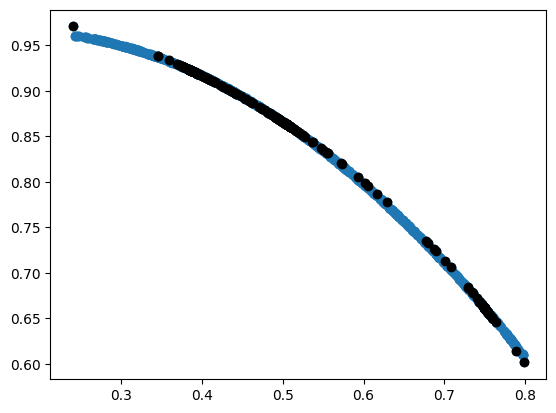

941 f(x) = [ 0.29183321 -0.88827873] 0.9423032147347536
942 f(x) = [ 0.29178994 -0.88823994] 0.9423138227335218
943 f(x) = [ 0.2917811  -0.88822735] 0.9423150602643486
944 f(x) = [ 0.2917811  -0.88822735] 0.9423150602643486
945 f(x) = [ 0.29166508 -0.88813728] 0.9423513146866935
946 f(x) = [ 0.29166508 -0.88813728] 0.9423513146866935
947 f(x) = [ 0.29160917 -0.88810142] 0.9423719447021084
948 f(x) = [ 0.29160917 -0.88810142] 0.9423719447021084
949 f(x) = [ 0.29160917 -0.88810142] 0.9423719447021084
950 f(x) = [ 0.29167553 -0.88815462] 0.9423520616214296


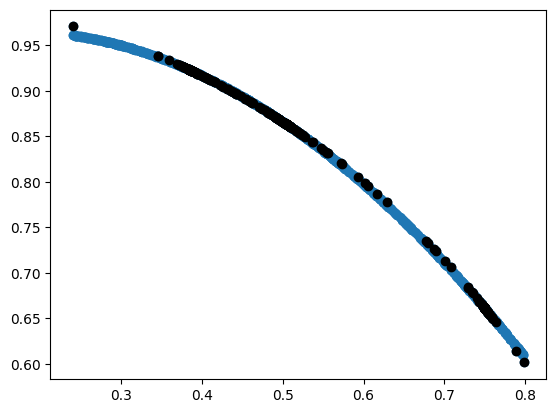

951 f(x) = [ 0.29167553 -0.88815462] 0.9423520616214296
952 f(x) = [ 0.29167553 -0.88815462] 0.9423520616214296
953 f(x) = [ 0.29172565 -0.8881951 ] 0.9423372106697621
954 f(x) = [ 0.29172565 -0.8881951 ] 0.9423372106697621
955 f(x) = [ 0.29172565 -0.8881951 ] 0.9423372106697621
956 f(x) = [ 0.29169879 -0.88816672] 0.9423433364573501
957 f(x) = [ 0.29169879 -0.88816672] 0.9423433364573501
958 f(x) = [ 0.29169879 -0.88816672] 0.9423433364573501
959 f(x) = [ 0.29169879 -0.88816672] 0.9423433364573501
960 f(x) = [ 0.29169879 -0.88816672] 0.9423433364573501


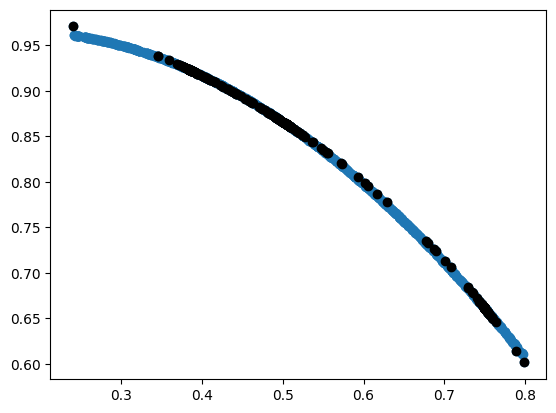

961 f(x) = [ 0.29121182 -0.88783654] 0.9424904531508803
962 f(x) = [ 0.29121599 -0.88783986] 0.9424891975896088
963 f(x) = [ 0.29124365 -0.88786318] 0.9424815600411673
964 f(x) = [ 0.29124365 -0.88786318] 0.9424815600411673
965 f(x) = [ 0.29124365 -0.88786318] 0.9424815600411673
966 f(x) = [ 0.29131863 -0.88793092] 0.9424634393586748
967 f(x) = [ 0.29131863 -0.88793092] 0.9424634393586748
968 f(x) = [ 0.29125815 -0.88788353] 0.9424820849918917
969 f(x) = [ 0.29125815 -0.88788353] 0.9424820849918917
970 f(x) = [ 0.29125815 -0.88788353] 0.9424820849918917


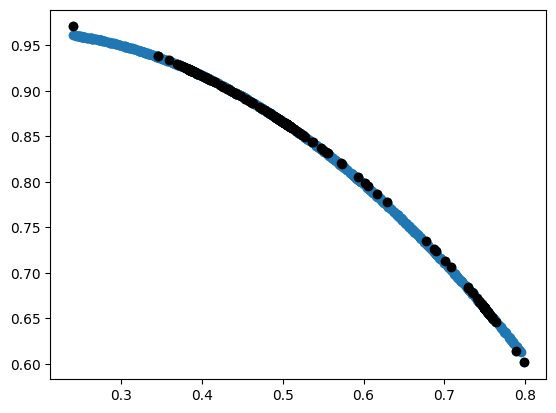

971 f(x) = [ 0.29052709 -0.88727361] 0.9426795501806522
972 f(x) = [ 0.29052709 -0.88727361] 0.9426795501806522
973 f(x) = [ 0.29052709 -0.88727361] 0.9426795501806522
974 f(x) = [ 0.29052709 -0.88727361] 0.9426795501806522
975 f(x) = [ 0.29052709 -0.88727361] 0.9426795501806522
976 f(x) = [ 0.29052709 -0.88727361] 0.9426795501806522
977 f(x) = [ 0.29049859 -0.8872438 ] 0.9426860851387633
978 f(x) = [ 0.29049859 -0.8872438 ] 0.9426860851387633
979 f(x) = [ 0.29049859 -0.8872438 ] 0.9426860851387633
980 f(x) = [ 0.29054594 -0.88728624] 0.9426743770457572


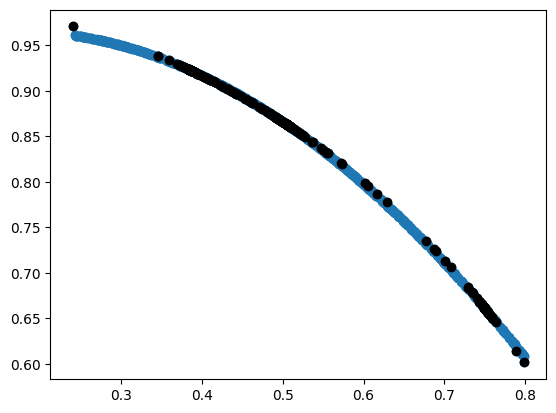

981 f(x) = [ 0.29054594 -0.88728624] 0.9426743770457572
982 f(x) = [ 0.29048298 -0.88724255] 0.9426966417959349
983 f(x) = [ 0.29040338 -0.88718292] 0.9427226832260343
984 f(x) = [ 0.290393   -0.88717374] 0.9427253071452903
985 f(x) = [ 0.29039663 -0.88717662] 0.9427242039854811
986 f(x) = [ 0.29039663 -0.88717662] 0.9427242039854811
987 f(x) = [ 0.29039663 -0.88717662] 0.9427242039854811
988 f(x) = [ 0.29031486 -0.88711317] 0.9427497117712976
989 f(x) = [ 0.29031486 -0.88711317] 0.9427497117712976
990 f(x) = [ 0.29038609 -0.8871769 ] 0.9427320027109434


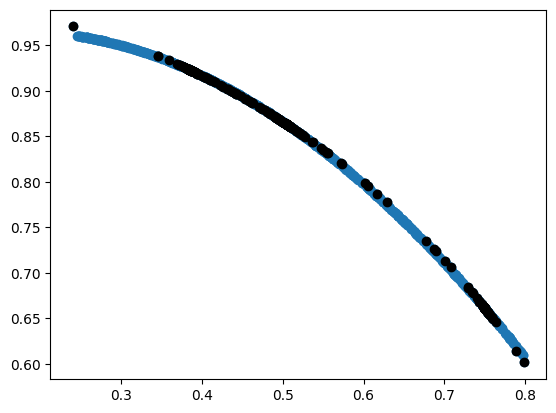

991 f(x) = [ 0.29038609 -0.8871769 ] 0.9427320027109434
992 f(x) = [ 0.29038609 -0.8871769 ] 0.9427320027109434
993 f(x) = [ 0.29038609 -0.8871769 ] 0.9427320027109434
994 f(x) = [ 0.29037065 -0.88715994] 0.9427354239155714
995 f(x) = [ 0.29051421 -0.88727603] 0.9426929228551675
996 f(x) = [ 0.29051421 -0.88727603] 0.9426929228551675
997 f(x) = [ 0.29050485 -0.88726775] 0.9426952896793543
998 f(x) = [ 0.29057903 -0.88733568] 0.942677633606742
999 f(x) = [ 0.29057903 -0.88733568] 0.942677633606742
1000 f(x) = [ 0.29057903 -0.88733568] 0.942677633606742


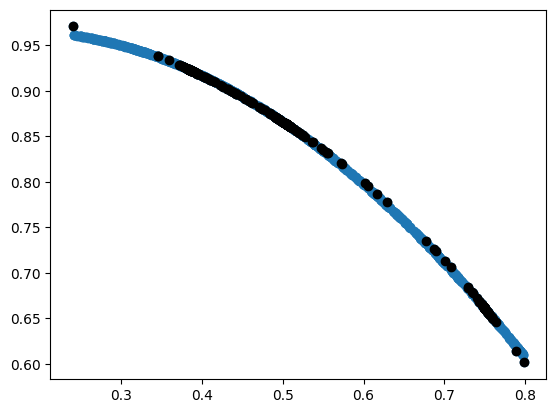

[0.45397509 0.47006907 0.74929189 0.39953392 0.39582969 0.74923665
 0.57286258 0.47425153 0.51173831 0.3725706  0.37194321 0.50598316
 0.51759165 0.6018461  0.74994414 0.50003383 0.74957877 0.50560857
 0.72943513 0.38306729 0.50550499 0.38297662 0.38290662 0.38558075
 0.68998934 0.3794196  0.4835251  0.38866077 0.50464857 0.38637532
 0.50129822 0.35849181 0.38446263 0.50483509 0.74968461 0.50925351
 0.73433715 0.75602448 0.38198456 0.48348642 0.39060606 0.44819073
 0.50463896 0.74974412 0.50369965 0.44233853 0.3867293  0.68702838
 0.74779572 0.3879983  0.49671878 0.74632412 0.75099681 0.49422825
 0.44223714 0.38465886 0.54940402 0.38208133 0.39529386 0.70788403
 0.51020533 0.75103901 0.50730169 0.75080366 0.38329684 0.75617495
 0.75053916 0.5038896  0.74802989 0.50767031 0.38408379 0.34549914
 0.34538501 0.75109541 0.37477549 0.43604723 0.7483922  0.50648076
 0.49208946 0.50231681 0.37717894 0.50720779 0.75364207 0.41034369
 0.49460499 0.50292236 0.62855775 0.38543455 0.52132133 0.5019

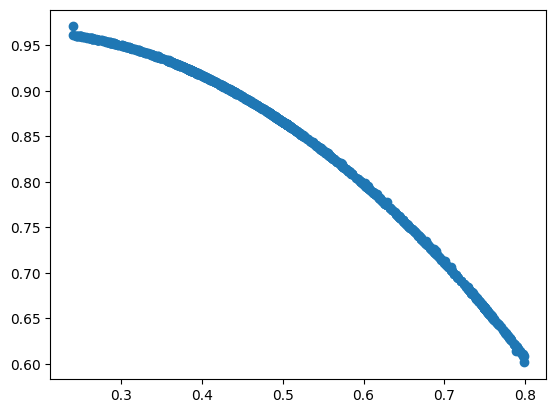

In [13]:
#initializing all of the points
from ctypes import set_errno

num = 1

#https://docs.python.org/3/library/random.html

setX = np.random.uniform(low=0.0, high=1.0, size = 1000)
setY = np.random.uniform(low=0.0, high=1.0, size = 1000)
#set all of the points at once

setXYP[:,0] = setX
setXYP[:,1] = setY


#https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/
lowXpoint = np.min(setXYP[:,0])
highXpoint = np.max(setXYP[:,1])

#running through the algorithm

for k in range (0, 1000):
#set as iteration instead
  #https://blog.finxter.com/how-to-apply-a-function-to-each-element-of-a-list/#:~:text=The%20best%20way%20to%20apply,is%20to%20use%20list%20comprehension.
  func = map(pen, setXYP[:,0], setXYP[:,1])
  setXYP[:,2] = np.fromiter(func,dtype=float)
  setXYP = setXYP[setXYP[:,2].argsort()] #https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-column
  #https://thispointer.com/sorting-2d-numpy-array-by-column-or-row-in-python/
  #print(setXYP)
#inputs the best values into an array of 100 for the best points

  newX = setXYP[:299,0]
  newY = setXYP[:299,1]

  newX = newX.reshape(-1,1)

#this selected the numbers of the different points that were the 100 best


#linear regression and graphing

#https://www.w3schools.com/python/python_ml_linear_regression.asp
#https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
#https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0
#https://www.statology.org/numpy-get-row/

  transforming.fit(newX)

  newX_x = transforming.transform(newX)

  polyReg = LinearRegression().fit(newX_x, newY) #this finds all of the values

  print(num, 'f(x) =', polyReg.coef_, polyReg.intercept_)

  coef1 = polyReg.coef_[1]
  coef2 = polyReg.coef_[0]
  yInt = polyReg.intercept_
  polyLine = list(map(poly, newX))

  if num % 10 == 0:

    plt.scatter(setXYP[:,0], setXYP[:,1])
    plt.scatter(newX, newY, color = 'k')
    plt.plot(newX, polyLine, color='r', linestyle = 'none')

    plt.show()

#replace points 100-1000

  minXBound = minSearch(lowXpoint)
  maxXBound = maxSearch(highXpoint)


  setXYP[300:1000,0] = np.random.uniform(low = minXBound, high = maxXBound, size = 700)


#find regression point first! then use that in the bounds

  #func = map(pen, setXYP[:,0], setXYP[:,1])
  #setXYP[:,2] = np.fromiter(func,dtype=float)

  yreg = map(poly, setXYP[300:1000,0])
  yReg = np.fromiter(yreg,dtype=float)

  min_y = map(minSearch, yReg)
  minY = np.fromiter(min_y,dtype=float)

  max_y = map(maxYSearch, yReg)
  maxY = np.fromiter(max_y,dtype=float)

  newY = map(randomY, minY, maxY)
  setXYP[300:1000,1] = np.fromiter(newY,dtype=float)

#https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/
  lowXpoint = np.min(setXYP[:,0])
  highXpoint = np.max(setXYP[:,0])
  num += 1

#prints the entirety of points at the end of all iterations

print(setXYP[:,0], setXYP[:,1])

plt.scatter(setXYP[:,0], setXYP[:,1])
#plt.plot(newX, line, color='r')

plt.show()
